# 🚗 Insurance Claim Prediction - Project Overview

## 📌 Problem Definition

This is a **binary classification** task aimed at predicting whether a customer will file an insurance claim in the next year. The dataset is split into:

- **Training Set**: `595,212` rows and `59` columns  
  Includes the **target variable** `Target`, where:
  - `1` = Claim Filed  
  - `0` = No Claim  

- **Test Set**: `892,816` rows and `58` columns  
  No `Target` column, we are required to predict the **probability** of a claim.

📝 Note: The dataset does **not** include semantic meanings of the features (likely due to privacy concerns), but each column is labeled with a **data type**:
- `binary` = 0 or 1  
- `nominal` = categorical, unordered  
- `ordinal` = categorical, ordered  
- `interval` = continuous (no absolute zero)

---

## 🔍 Exploratory Data Analysis (EDA)

Here are key steps and questions to guide the analysis:

### 1. Data Cleaning
- Are there any **missing values**, **duplicates**, or **constant columns**?
- Are there any **outliers** in continuous features?

### 2. Feature Types
- How should each variable type be encoded?
  - Nominal: One-Hot or Target Encoding
  - Ordinal: Label Encoding or custom mapping
  - Interval: Normalization or Standardization

### 3. Visualization
- What are the distributions of the features?
- Are any features highly correlated with the target?

---

## 🧠 Feature Engineering

Some ideas to improve model performance:

- Feature transformations (e.g., log-scaling, binning)
- Interaction features (multiplication, difference)
- Group-based statistical features (mean/median per user group)
- Dimensionality reduction (PCA, TSNE for visualization)

---

## 🤖 Modeling Strategy

Since this is **tabular data**, the most suitable models include:

- ✅ **XGBoost**, **LightGBM**, **CatBoost** (tree-based models)
- ✅ Logistic Regression as a baseline

### 📈 Evaluation Metric
We are required to predict **probabilities**, and the performance will be measured using:

- **Normalized Gini Coefficient**  
  Gini = `2 * AUC - 1`

### 🧪 Tips to Improve Modeling:
- Use **Stratified K-Fold Cross Validation**
- Apply **Early Stopping** to avoid overfitting
- Tune key hyperparameters:
  - `max_depth`, `learning_rate`, `n_estimators`
  - `min_child_weight`, `subsample`, `colsample_bytree`

---

## 🧪 Model Testing & Deployment

- 📦 **Version Control**: Save different model versions with parameters and performance
- 🧾 **Notebook Integration**: Combine EDA, preprocessing, and modeling steps in a single well-documented notebook
- ✅ **Final Output**: Submit a `.csv` file with `ID` and predicted **claim probabilities**

---

Let me know if you'd like to extend this with LaTeX math (for Gini calculation), diagrams (feature importance, model performance), or code examples in each section!


In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [2]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, encoding='utf-8'):
    """
    Downloads a file from Google Drive using its file ID and loads it into a pandas DataFrame.

    Parameters:
        file_id (str): The Google Drive file ID.
        file_type (str): File extension, such as 'csv', 'gz', or 'xlsx'.
        encoding (str): Encoding format for reading the file. Default is 'utf-8'.

    Returns:
        pd.DataFrame: The loaded dataset.
    """

    # Construct the Google Drive download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Define the local output file name
    output = f'downloaded_file.{file_type}'

    # Download the file from Google Drive
    gdown.download(download_url, output, quiet=False)

    # Read the file based on its type
    if file_type in ['csv', 'gz']:
        data = pd.read_csv(output, encoding=encoding)  # Load CSV or compressed CSV
    elif file_type == 'xlsx':
        data = pd.read_excel(output)  # Load Excel file
    else:
        raise ValueError("Unsupported file type. Please use 'csv', 'gz', or 'xlsx'.")

    return data

# Example usage
file_id = '19Ptwxjvax9UudGYKYFruf2F1R5TOVMgK'  # Replace with your actual Google Drive file ID
file_type = 'gz'
train = load_from_drive(file_id, file_type)
train.head()

Downloading...
From (original): https://drive.google.com/uc?id=19Ptwxjvax9UudGYKYFruf2F1R5TOVMgK
From (redirected): https://drive.google.com/uc?id=19Ptwxjvax9UudGYKYFruf2F1R5TOVMgK&confirm=t&uuid=a6496360-9ff9-4bf3-86bd-df1ab9ce7603
To: /content/downloaded_file.gz
100%|██████████| 27.4M/27.4M [00:00<00:00, 33.3MB/s]


id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [3]:
file_id = '1zuqvae_D_m1P3P2nAHhvC8rKHpECu_xN'
file_type = 'gz'
test = load_from_drive(file_id, file_type)
test.head()

Downloading...
From (original): https://drive.google.com/uc?id=1zuqvae_D_m1P3P2nAHhvC8rKHpECu_xN
From (redirected): https://drive.google.com/uc?id=1zuqvae_D_m1P3P2nAHhvC8rKHpECu_xN&confirm=t&uuid=9659d830-ba84-4f89-8a72-ac5611f94627
To: /content/downloaded_file.gz
100%|██████████| 40.7M/40.7M [00:00<00:00, 48.0MB/s]


id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   0          0              1          8              1              0   
1   1          4              2          5              1              0   
2   2          5              1          3              0              0   
3   3          0              1          6              0              0   
4   4          5              1          7              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              1              0              0              0  ...   
4              0              0              0              1  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           1           1           1          12               0   
1           2           0           3          10               0   
2           4           0           2           4               0   
3           5           1           0           5               1   
4           4           0           0           4               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               0               1               1               0   
2               0               0               0               0   
3               0               1               0               0   
4               1               1               0               0   

   ps_calc_20_bin  
0               1  
1               1  
2               0  
3               0  
4               1  

[5 rows x 58 columns]

## 📘 Feature Description

Due to privacy and customer security concerns, the **actual meanings of feature names are not disclosed**.

- Features belonging to **similar categories are grouped by prefixes** in their names, such as:
  - `ind` (individual)
  - `reg` (regional)
  - `car` (car-related)
  - `calc` (calculation-related)

- Feature names ending with:
  - **`_bin`** represent **binary features** (values of `0` or `1`)
  - **`_cat`** represent **categorical features**

- Features **without these suffixes** may be either **continuous** or **ordinal**, although no specific information is provided.

- A value of **`-1`** indicates a **missing value** for that feature in a given observation.

- The **`target`** column is the label:
  - `1` = the policyholder **filed a claim**
  - `0` = the policyholder **did not file a claim**


In [4]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


### **1. Individual Features (`ps_ind_*`)**

- `ps_ind_01`: Driver age group (continuous/ordinal, e.g., 18–25, 26–35, ...)
- `ps_ind_02_cat`: Driver license type (categorical, e.g., C1, C2, A2)
- `ps_ind_03`: Years of driving experience (continuous, in years)
- `ps_ind_04_cat`: Occupational risk level (categorical, e.g., white-collar, high-risk job)
- `ps_ind_06_bin`: History of past accidents (binary: 0 = No, 1 = Yes)
- `ps_ind_07_bin`: Has official Tesla dashcam installed (binary)
- `ps_ind_16_bin`: Attended Tesla safe driving training (binary)

---

### **2. Vehicle Features (`ps_car_*`)**

- `ps_car_01_cat`: Car model category (e.g., Model 3, Y, S, X)
- `ps_car_03_cat`: Battery type (e.g., LFP, NMC)
- `ps_car_05_cat`: Charging method (e.g., home charger, supercharger, third-party)
- `ps_car_11`: Battery health score (continuous, range 0–100)
- `ps_car_12`: Average charging time per session (in hours)
- `ps_car_13`: Annual average energy consumption (kWh per 100 km)
- `ps_car_15`: Autopilot usage frequency (continuous, e.g., daily minutes)

---

### **3. Regional Features (`ps_reg_*`)**

- `ps_reg_01`: Climate risk index of the registration area (e.g., high rainfall/snowfall)
- `ps_reg_02`: Traffic congestion index (continuous)
- `ps_reg_03`: EV charger density (number of chargers per square kilometer)

---

### **4. Driving Behavior Features (`ps_calc_*`)**

- `ps_calc_01`: Aggressive driving score (based on hard acceleration/braking frequency)
- `ps_calc_04`: Proportion of driving time at night (continuous)
- `ps_calc_10`: Long-distance driving frequency (e.g., number of trips >300km per month)
- `ps_calc_15_bin`: "Sentry Mode" enabled (binary)


## 🎯 Project Objective

In this project, we are given **58 features** per driver. Our goal is to **predict the probability that a driver will file an insurance claim in the following year**.

This prediction task has value on multiple levels:

---

### ✅ **Driver-Level Benefits**
- Helps drivers **reduce unnecessary insurance costs**
- Encourages **rational decision-making** when purchasing insurance
- Provides personalized risk assessment, increasing driver trust and transparency

---

### ✅ **Company-Level Benefits**
- Enables more **accurate pricing** of insurance products
- Enhances understanding of customer profiles and **claim tendencies**
- Improves **customer segmentation and targeting**, increasing market competitiveness

---

### ✅ **Strategic-Level Benefits**
- Narrows the scope of customer feature research, **reducing research costs**
- Allows for **focused investment in high-value features**
- Enables **faster response to new customer profiles and claim behaviors**

---

Overall, a well-performing predictive model not only boosts operational efficiency but also creates tangible value across the insurance ecosystem.


### 📊 Feature Types

In this project, to protect customer privacy, the actual **semantic meaning** of the 58 features is **not disclosed**.  
In simple terms, we cannot analyze the features **intuitively based on column names**, and we cannot tell directly which features are truly effective for prediction.

---

#### 🔍 A Real-World Analogy:

Imagine you are trying to predict whether a person is male or female. Naturally, you might look at features like **hair length**, **height**, or **weight**. Based on your intuition and experience, you would **evaluate the importance of these features** and make relatively accurate judgments.

> This natural feature understanding helps you avoid unnecessary complexity in modeling.

---

#### 🤖 The Challenge in This Project:

However, in this case, **feature semantics are masked**.  
We **cannot rely on prior knowledge** or subjective judgment to assess feature importance.

Therefore, we must:
- Carefully examine the **variable types** (e.g., binary, categorical, continuous)
- Explore feature relationships through **statistical analysis** and **modeling**
- Use data-driven approaches to **identify valuable patterns**

This makes **feature processing and interpretation** the most critical—and challenging—part of the project.


### 🧾 Metadata

This term might sound unfamiliar to some—though with the hype around the **metaverse**, it probably sounds more familiar now! 😄

---

#### 📌 What is Metadata?

**Metadata** is often referred to as "**data about data**".  
It describes other data, and is sometimes called **intermediary data**.

---

#### 💡 Why is Metadata Important in a Project?

When working with real-world datasets—especially those with **high dimensionality** or **many features**—it becomes difficult to navigate and interpret all the columns efficiently.

Metadata provides a **structured overview** of the data, helping us:

- Understand what each feature represents (if available)
- Group and categorize variables by type or relevance
- Prepare for deeper tasks like **data analysis**, **visualization**, or **modeling**

---

#### 🧠 What Can Metadata Help With?

Metadata helps describe a dataset's **properties**, and gives us insight into:

- How the data is **organized**
- What each feature's **role or data type** is
- How we should approach **feature engineering**, **encoding**, and **model design**

In short, metadata is an essential first step in building a **well-structured, scalable, and explainable** data science workflow.


In [5]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [6]:
full_set = pd.concat([train,test],ignore_index=True)

In [7]:
# Create the basic structure of the metadata DataFrame
meta = pd.DataFrame([
    {
        'Feature Name': col,
        'Role': (
            'Target (label)' if col == 'target' else
            'ID (non-feature)' if col == 'id' else
            'Feature'
        ),
        'Variable Type': (
            'binary' if ('bin' in col or col == 'target') else
            'nominal' if ('cat' in col or col == 'id') else
            'interval' if dtype == 'float64' else 'ordinal'
        ),
        'Data Type': dtype,
        'Keep': col != 'id'
    }
    for col, dtype in full_set.dtypes.items()
]).set_index('Feature Name')

# Count number of unique values for categorical and ordinal features
condition = (meta['Variable Type'] != 'interval') & meta['Keep']
cols_to_count = meta.index[condition]
unique_values = full_set[cols_to_count].replace(-1, np.nan).nunique()

# Add unique count column to metadata
meta['# Unique'] = 'Not Applicable'
meta.loc[cols_to_count, '# Unique'] = unique_values

# Calculate missing values count and percentage
missing_counts = (full_set == -1).sum()
missing_percent = missing_counts / len(full_set) * 100
meta['Missing'] = [f"{int(c)} ({p:.2f}%)" for c, p in zip(missing_counts, missing_percent)]

# Display the metadata table
meta


Role Variable Type Data Type   Keep  \
Feature Name                                                      
id              ID (non-feature)       nominal     int64  False   
target            Target (label)        binary   float64   True   
ps_ind_01                Feature       ordinal     int64   True   
ps_ind_02_cat            Feature       nominal     int64   True   
ps_ind_03                Feature       ordinal     int64   True   
ps_ind_04_cat            Feature       nominal     int64   True   
ps_ind_05_cat            Feature       nominal     int64   True   
ps_ind_06_bin            Feature        binary     int64   True   
ps_ind_07_bin            Feature        binary     int64   True   
ps_ind_08_bin            Feature        binary     int64   True   
ps_ind_09_bin            Feature        binary     int64   True   
ps_ind_10_bin            Feature        binary     int64   True   
ps_ind_11_bin            Feature        binary     int64   True   
ps_ind_12_bin            Feature        binary     int64   True   
ps_ind_13_bin            Feature        binary     int64   True   
ps_ind_14                Feature       ordinal     int64   True   
ps_ind_15                Feature       ordinal     int64   True   
ps_ind_16_bin            Feature        binary     int64   True   
ps_ind_17_bin            Feature        binary     int64   True   
ps_ind_18_bin            Feature        binary     int64   True   
ps_reg_01                Feature      interval   float64   True   
ps_reg_02                Feature      interval   float64   True   
ps_reg_03                Feature      interval   float64   True   
ps_car_01_cat            Feature       nominal     int64   True   
ps_car_02_cat            Feature       nominal     int64   True   
ps_car_03_cat            Feature       nominal     int64   True   
ps_car_04_cat            Feature       nominal     int64   True   
ps_car_05_cat            Feature       nominal     int64   True   
ps_car_06_cat            Feature       nominal     int64   True   
ps_car_07_cat            Feature       nominal     int64   True   
ps_car_08_cat            Feature       nominal     int64   True   
ps_car_09_cat            Feature       nominal     int64   True   
ps_car_10_cat            Feature       nominal     int64   True   
ps_car_11_cat            Feature       nominal     int64   True   
ps_car_11                Feature       ordinal     int64   True   
ps_car_12                Feature      interval   float64   True   
ps_car_13                Feature      interval   float64   True   
ps_car_14                Feature      interval   float64   True   
ps_car_15                Feature      interval   float64   True   
ps_calc_01               Feature      interval   float64   True   
ps_calc_02               Feature      interval   float64   True   
ps_calc_03               Feature      interval   float64   True   
ps_calc_04               Feature       ordinal     int64   True   
ps_calc_05               Feature       ordinal     int64   True   
ps_calc_06               Feature       ordinal     int64   True   
ps_calc_07               Feature       ordinal     int64   True   
ps_calc_08               Feature       ordinal     int64   True   
ps_calc_09               Feature       ordinal     int64   True   
ps_calc_10               Feature       ordinal     int64   True   
ps_calc_11               Feature       ordinal     int64   True   
ps_calc_12               Feature       ordinal     int64   True   
ps_calc_13               Feature       ordinal     int64   True   
ps_calc_14               Feature       ordinal     int64   True   
ps_calc_15_bin           Feature        binary     int64   True   
ps_calc_16_bin           Feature        binary     int64   True   
ps_calc_17_bin           Feature        binary     int64   True   
ps_calc_18_bin           Feature        binary     int64   True   
ps_calc_19_bin           Feature        binary     int64   True   
ps_calc_

In [8]:
# Group and count features by role and variable type
pd.DataFrame(
    {
        'Count': meta.groupby(['Role', 'Variable Type']).size()
    }
).reset_index()

Role Variable Type  Count
0           Feature        binary     17
1           Feature      interval     10
2           Feature       nominal     14
3           Feature       ordinal     16
4  ID (non-feature)       nominal      1
5    Target (label)        binary      1

In [9]:
# Select all interval (continuous) features from the dataset
interval_features = meta[meta['Variable Type'] == 'interval'].index

# Generate descriptive statistics for those features
stats = full_set[interval_features].describe()
stats


ps_reg_01  ps_reg_02  ps_reg_03  ps_car_12  ps_car_13  ps_car_14  \
count 1488028.00 1488028.00 1488028.00 1488028.00 1488028.00 1488028.00   
mean        0.61       0.44       0.55       0.38       0.81       0.28   
std         0.29       0.40       0.79       0.06       0.22       0.36   
min         0.00       0.00      -1.00      -1.00       0.25      -1.00   
25%         0.40       0.20       0.53       0.32       0.67       0.33   
50%         0.70       0.30       0.72       0.37       0.77       0.37   
75%         0.90       0.60       1.00       0.40       0.91       0.40   
max         0.90       1.80       4.42       1.26       4.03       0.64   

       ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  
count 1488028.00  1488028.00  1488028.00  1488028.00  
mean        3.07        0.45        0.45        0.45  
std         0.73        0.29        0.29        0.29  
min         0.00        0.00        0.00        0.00  
25%         2.83        0.20        0.20        0.20  
50%         3.32        0.40        0.50        0.50  
75%         3.61        0.70        0.70        0.70  
max         3.74        0.90        0.90        0.90

In [10]:
# 🔍 Find continuous (interval) features that are part of the 'calc' group

calc_col_interval = [
    col for col in meta[meta['Variable Type'] == 'interval'].index
    if 'calc' in col
]
calc_col_interval

['ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [11]:
full_set[calc_col_interval].describe()

ps_calc_01  ps_calc_02  ps_calc_03
count  1488028.00  1488028.00  1488028.00
mean         0.45        0.45        0.45
std          0.29        0.29        0.29
min          0.00        0.00        0.00
25%          0.20        0.20        0.20
50%          0.40        0.50        0.50
75%          0.70        0.70        0.70
max          0.90        0.90        0.90

In [12]:
train.target.describe()

count   595212.00
mean         0.04
std          0.19
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: target, dtype: float64

In [13]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-05-13 23:22:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.214.138, 172.217.214.101, 172.217.214.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-13 23:22:37--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.206.132, 2607:f8b0:4001:c62::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.206.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-05-13 

<Axes: xlabel='target'>

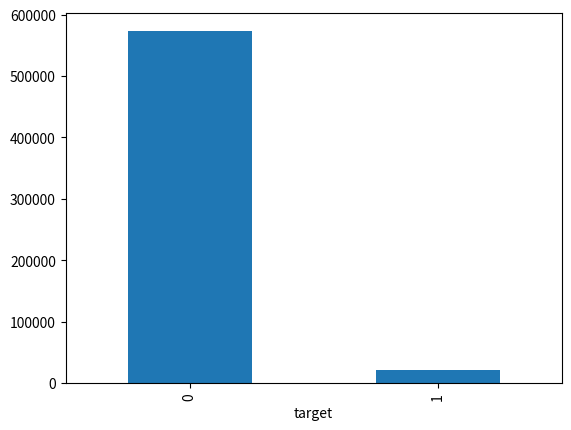

In [14]:
train.target.value_counts().plot(kind = 'bar')

## ⚖️ Imbalanced Classification

In our training set, around **97% of the data is labeled as `0`** (no claim), while only **about 3% is labeled as `1`** (claim filed).

This presents a **significant class imbalance**, where the **negative class dominates** the dataset.

---

### 🎯 What We Actually Want:

Ideally, we would like the training set to contain **more positive samples** (`1`s — claim filed), because:

- More positive examples help the model **learn the characteristics of the claim class more effectively**
- A model trained on a severely imbalanced dataset tends to **predict the majority class**, which leads to poor recall and precision on the minority class
- When new data is introduced, we want the model to be **sensitive to detecting the rare but important positive class**

---

### 🧪 Next Steps:

To address this imbalance, we may consider:
- **Resampling techniques** (e.g., SMOTE, ADASYN, Random Oversampling/Undersampling)
- **Class-weight adjustment** in the loss function
- **Evaluation metrics** that focus on minority class performance (e.g., F1-score, AUC, Gini)

Let me know if you'd like code examples to implement any of these!

No Claim Filed: 573518
Claim Filed: 21694
Ratio: 26.44 : 1


<Axes: title={'center': 'Target Class Distribution'}, xlabel='target'>

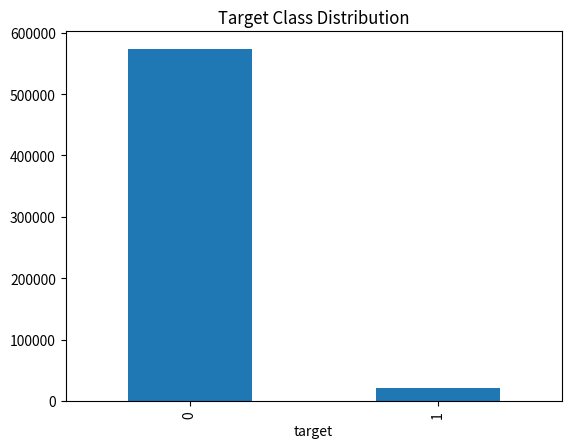

In [15]:
import numpy as np
import pandas as pd

# Count the number of instances for each class
target_count = train.target.value_counts()

# Print class distribution
print('No Claim Filed:', target_count[0])
print('Claim Filed:', target_count[1])
print('Ratio:', round(target_count[0] / target_count[1], 2), ': 1')

# Plot class distribution
target_count.plot(kind='bar', title='Target Class Distribution')

In [16]:
# Baseline model: Logistic Regression on raw features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Remove 'id' and 'target' columns to get feature set
features = train.columns[2:]

X = train[features]
y = train['target']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

# Train a logistic regression model (liblinear solver is good for small datasets)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 96.34%


In [17]:
model.fit(X_train[['ps_calc_02']], y_train)
y_pred = model.predict(X_test[['ps_calc_02']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

def undersampling_borderlinesmote(df, desired_prop_rate=0.15, smote_ratio=0.5):
    """
    Performs class balancing by applying random undersampling to the majority class (target=0),
    followed by BorderlineSMOTE oversampling to the minority class (target=1).

    Parameters:
    - df: Input DataFrame containing features and 'target' column.
    - desired_prop_rate: Desired proportion of positive class (target=1) after undersampling.
    - smote_ratio: The oversampling ratio for BorderlineSMOTE.

    Returns:
    - resampled_df: A new balanced DataFrame after undersampling and SMOTE.
    """

    # Get indices for each class
    idx_class_0 = df[df['target'] == 0].index
    idx_class_1 = df[df['target'] == 1].index

    # Count number of samples in each class
    count_class_0 = len(idx_class_0)
    count_class_1 = len(idx_class_1)

    # Calculate undersampling rate for target=0 based on desired positive class proportion
    undersampling_rate = ((1 - desired_prop_rate) * count_class_1) / (count_class_0 * desired_prop_rate)
    undersampled_majority_size = int(undersampling_rate * count_class_0)

    print(f"Undersampling rate for target=0: [{undersampling_rate:.4f}]")
    print(f"Number of target=0 samples after undersampling: [{undersampled_majority_size}]")

    # Perform random undersampling on majority class
    np.random.seed(100)
    undersampled_idx = np.random.choice(idx_class_0, size=undersampled_majority_size, replace=False)

    # Combine undersampled majority and full minority class
    idx_total = np.concatenate([undersampled_idx, idx_class_1])
    df = df.loc[idx_total].reset_index(drop=True)

    # Prepare for BorderlineSMOTE oversampling
    X = df.drop('target', axis=1)
    y = df['target']

    smote = BorderlineSMOTE(random_state=42, k_neighbors=5, sampling_strategy=smote_ratio)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Rebuild DataFrame after resampling
    resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='target')], axis=1)

    # Post-sampling class distribution
    post_count_class_0 = (resampled_df['target'] == 0).sum()
    post_count_class_1 = (resampled_df['target'] == 1).sum()
    print(f"Post-sampling count of target=0: [{post_count_class_0}]")
    print(f"Post-sampling count of target=1: [{post_count_class_1}]")
    print(f"Final class ratio (0:1): [{post_count_class_0 / post_count_class_1:.2f}]")

    return resampled_df

In [20]:
train_balanced = undersampling_borderlinesmote(df = train)

Undersampling rate for target=0: [0.2143]
Number of target=0 samples after undersampling: [122932]
Post-sampling count of target=0: [122932]
Post-sampling count of target=1: [61466]
Final class ratio (0:1): [2.00]


In [21]:
full_set_update = pd.concat([train_balanced,test],ignore_index=True)

In [22]:
full_set_update

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0         744529          2              1          9              1   
1         673907          1              1          2              1   
2         730796          7              1          6              0   
3         306142          1              1          3              0   
4        1102701          6              2          7              1   
...          ...        ...            ...        ...            ...   
1077209  1488022          0              1          6              0   
1077210  1488023          5              3          5              1   
1077211  1488024          0              1          5              0   
1077212  1488025          6              1          5              1   
1077213  1488026          7              1          4              1   

         ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                    0              0              0              1   
1                    0              0              1              0   
2                    4              0              0              0   
3                    0              1              0              0   
4                    0              0              1              0   
...                ...            ...            ...            ...   
1077209              0              0              1              0   
1077210              0              0              0              1   
1077211              0              1              0              0   
1077212              0              0              0              0   
1077213              0              0              0              0   

         ps_ind_09_bin  ...  ps_calc_12  ps_calc_13  ps_calc_14  \
0                    0  ...           1           2           8   
1                    0  ...           4           4           9   
2                    1  ...           1           3           7   
3                    0  ...           0           2           9   
4                    0  ...           0           2           9   
...                ...  ...         ...         ...         ...   
1077209              0  ...           2           3           4   
1077210              0  ...           2           2          11   
1077211              0  ...           2           2          11   
1077212              1  ...           1           2           7   
1077213              1  ...           2           2           7   

         ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
0                     0               0               1               0   
1                     1               1               1               1   
2                     0               1               1               0   
3                     0               0               1               0   
4                     0               0               1               1   
...                 ...             ...             ...             ...   
1077209               0               1               0               0   
1077210               0               0               1               1   
1077211               0               1               1               0   
1077212               1               1               0               0   
1077213               0               1               1               1   

         ps_calc_19_bin  ps_calc_20_bin  target  
0                     0               0    0.00  
1                     1               0    0.00  
2                     0               0    0.00  
3                     0               0    0.00  
4                     0               1    0.00  
...                 ...             ...     ...  
1077209               1               0     NaN  
1077210               0               0     NaN  
1077211               0               0     NaN  
1077212               0               0     NaN  
1077213               0               0 

In [23]:
train_balanced_update = train_balanced.copy()
full_set_update_copy = full_set_update.copy()

In [26]:
# 📊 Create Metadata DataFrame to describe each feature

metadata = pd.DataFrame([
    {
        'Feature Name': col,
        'Role': (
            'Target (claim status)' if col == 'target' else
            'ID (not a feature)' if col == 'id' else
            'Feature'
        ),
        'Variable Type': (
            'binary' if ('bin' in col or col == 'target') else
            'nominal' if ('cat' in col or col == 'id') else
            'interval' if dtype == 'float64' else 'ordinal'
        ),
        'Data Type': dtype,
        'Keep': col != 'id'
    }
    for col, dtype in full_set_update.dtypes.items()
]).set_index('Feature Name')

# 🧮 Count unique values for categorical and ordinal features (excluding interval types)
condition = (metadata['Variable Type'] != 'interval') & metadata['Keep']
cols_to_count = metadata.index[condition]
unique_values = full_set_update[cols_to_count].replace(-1, np.nan).nunique()

metadata['# Unique Values'] = 'Not Applicable'
metadata.loc[cols_to_count, '# Unique Values'] = unique_values

# 📉 Calculate missing value counts and percentages (where -1 indicates missing)
missing_counts = (full_set_update == -1).sum()
missing_percent = (missing_counts / len(full_set_update)) * 100
metadata['Missing Values'] = [
    f"{int(c)} ({p:.2f}%)" for c, p in zip(missing_counts, missing_percent)
]

# 👀 Show the final metadata table
metadata


Role Variable Type Data Type   Keep  \
Feature Name                                                           
id                 ID (not a feature)       nominal     int64  False   
ps_ind_01                     Feature       ordinal     int64   True   
ps_ind_02_cat                 Feature       nominal     int64   True   
ps_ind_03                     Feature       ordinal     int64   True   
ps_ind_04_cat                 Feature       nominal     int64   True   
ps_ind_05_cat                 Feature       nominal     int64   True   
ps_ind_06_bin                 Feature        binary     int64   True   
ps_ind_07_bin                 Feature        binary     int64   True   
ps_ind_08_bin                 Feature        binary     int64   True   
ps_ind_09_bin                 Feature        binary     int64   True   
ps_ind_10_bin                 Feature        binary     int64   True   
ps_ind_11_bin                 Feature        binary     int64   True   
ps_ind_12_bin                 Feature        binary     int64   True   
ps_ind_13_bin                 Feature        binary     int64   True   
ps_ind_14                     Feature       ordinal     int64   True   
ps_ind_15                     Feature       ordinal     int64   True   
ps_ind_16_bin                 Feature        binary     int64   True   
ps_ind_17_bin                 Feature        binary     int64   True   
ps_ind_18_bin                 Feature        binary     int64   True   
ps_reg_01                     Feature      interval   float64   True   
ps_reg_02                     Feature      interval   float64   True   
ps_reg_03                     Feature      interval   float64   True   
ps_car_01_cat                 Feature       nominal     int64   True   
ps_car_02_cat                 Feature       nominal     int64   True   
ps_car_03_cat                 Feature       nominal     int64   True   
ps_car_04_cat                 Feature       nominal     int64   True   
ps_car_05_cat                 Feature       nominal     int64   True   
ps_car_06_cat                 Feature       nominal     int64   True   
ps_car_07_cat                 Feature       nominal     int64   True   
ps_car_08_cat                 Feature       nominal     int64   True   
ps_car_09_cat                 Feature       nominal     int64   True   
ps_car_10_cat                 Feature       nominal     int64   True   
ps_car_11_cat                 Feature       nominal     int64   True   
ps_car_11                     Feature       ordinal     int64   True   
ps_car_12                     Feature      interval   float64   True   
ps_car_13                     Feature      interval   float64   True   
ps_car_14                     Feature      interval   float64   True   
ps_car_15                     Feature      interval   float64   True   
ps_calc_01                    Feature      interval   float64   True   
ps_calc_02                    Feature      interval   float64   True   
ps_calc_03                    Feature      interval   float64   True   
ps_calc_04                    Feature       ordinal     int64   True   
ps_calc_05                    Feature       ordinal     int64   True   
ps_calc_06                    Feature       ordinal     int64   True   
ps_calc_07                    Feature       ordinal     int64   True   
ps_calc_08                    Feature       ordinal     int64   True   
ps_calc_09                    Feature       ordinal     int64   True   
ps_calc_10                    Feature       ordinal     int64   True   
ps_calc_11                    Feature       ordinal     int64   True   
ps_calc_12                    Feature       ordinal     int64   True   
ps_calc_13                    Feature       ordinal     int64   True   
ps_calc_14                    Feature       ordinal     int64   True   
ps_calc_15_bin                Feature        binary     int64   True   
ps_calc_16_bin                Feature        binary     int64   True   
p

In [27]:
# Step: Sort all features by missing count (descending) and select the top entries
missing_summary = pd.DataFrame(
    sorted(
        zip(metadata.index, metadata['Variable Type'], metadata['Missing Values']),
        key=lambda x: int(x[2].split('(')[0]),  # Sort by raw missing count
        reverse=True
    ),
    columns=['Feature Name', 'Variable Type', 'Missing Values']
).iloc[:12, :]  # Display top 12 for broader context

# Extract just the top 3 feature names with most missing values
missing_cols_top3 = missing_summary.iloc[:3, 0].tolist()

# Show the summary table
missing_summary

Feature Name Variable Type   Missing Values
0   ps_car_03_cat       nominal  730664 (67.83%)
1   ps_car_05_cat       nominal  470243 (43.65%)
2       ps_reg_03      interval  187723 (17.43%)
3       ps_car_14      interval    74642 (6.93%)
4   ps_car_07_cat       nominal    20540 (1.91%)
5   ps_ind_05_cat       nominal    10336 (0.96%)
6   ps_car_09_cat       nominal     1042 (0.10%)
7   ps_ind_02_cat       nominal      387 (0.04%)
8   ps_car_01_cat       nominal      213 (0.02%)
9   ps_ind_04_cat       nominal      193 (0.02%)
10  ps_car_02_cat       nominal        5 (0.00%)
11      ps_car_11       ordinal        2 (0.00%)

In [28]:
missing_cols = missing_summary.iloc[:,0]

In [29]:
cols_to_drop=['ps_car_03_cat','ps_car_05_cat']

In [30]:
# Mark selected columns to be excluded from modeling
metadata.loc[cols_to_drop, 'Keep'] = False

In [31]:
full_set_update[['ps_reg_03','ps_car_14']].replace(-1,np.nan).describe()

ps_reg_03  ps_car_14
count  889491.00 1002572.00
mean        0.89       0.37
std         0.36       0.08
min        -1.00      -1.00
25%         0.63       0.35
50%         0.80       0.37
75%         1.09       0.40
max         4.42       0.64

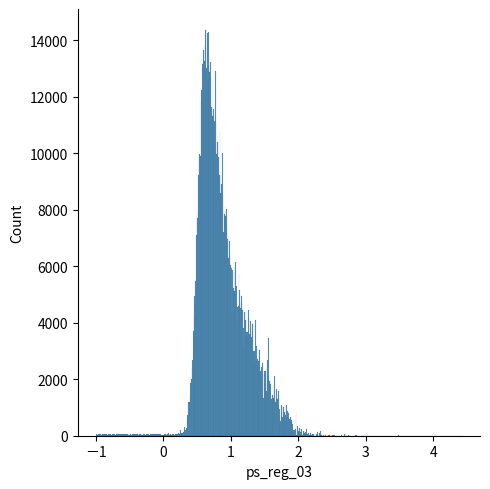

In [32]:
sns.displot(full_set_update.ps_reg_03.replace(-1,np.nan))

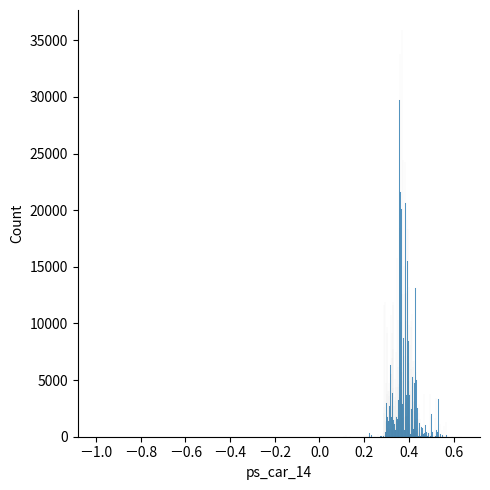

In [33]:
sns.displot(full_set_update.ps_car_14.replace(-1,np.nan))

In [41]:
missing_cat_cols = missing_cols[4:].tolist()

In [42]:
missing_cat_cols

['ps_car_07_cat',
 'ps_ind_05_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_car_01_cat',
 'ps_ind_04_cat',
 'ps_car_02_cat',
 'ps_car_11']

<Figure size 640x480 with 0 Axes>

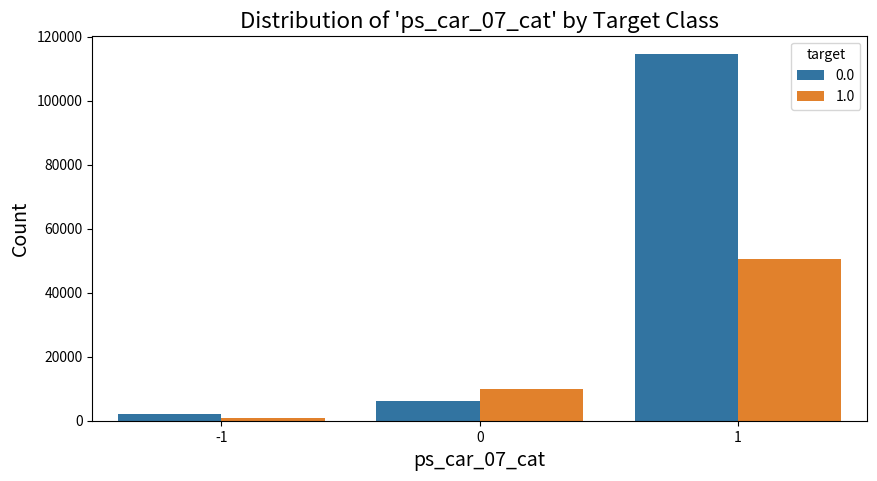

<Figure size 640x480 with 0 Axes>

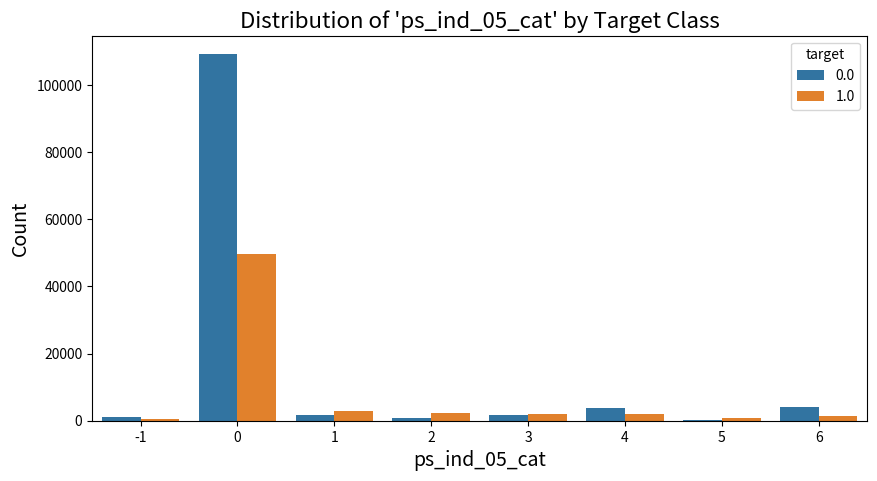

<Figure size 640x480 with 0 Axes>

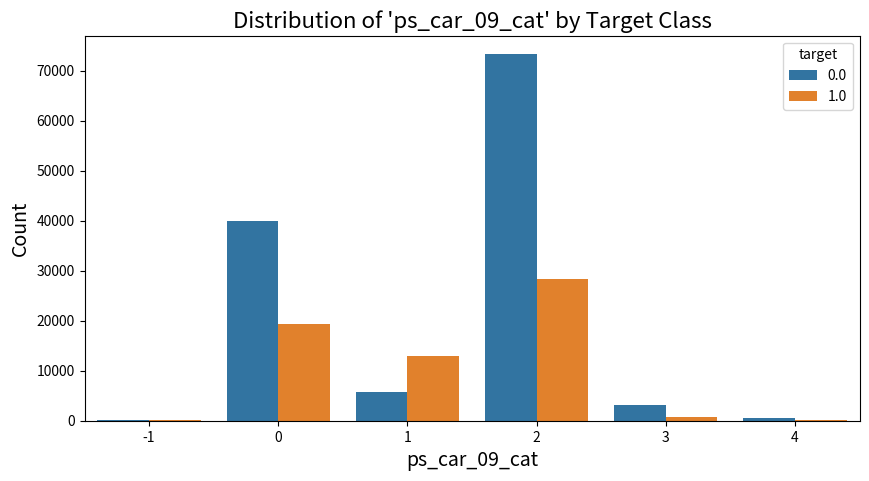

<Figure size 640x480 with 0 Axes>

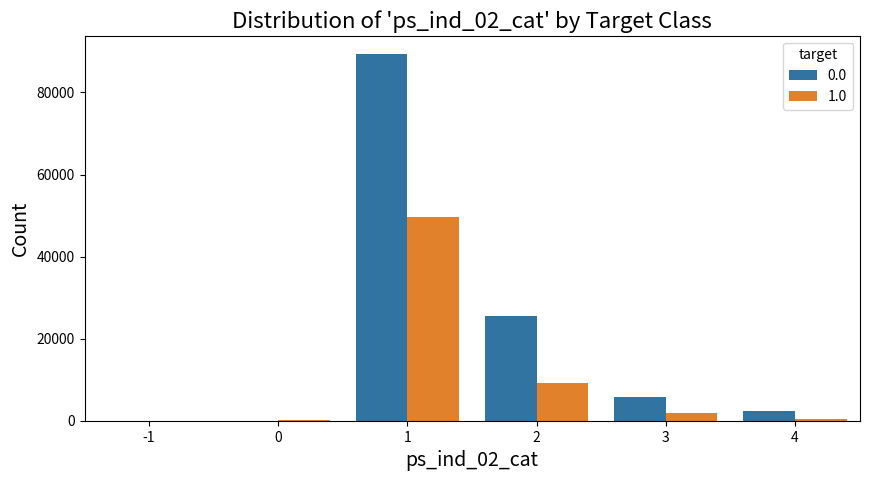

<Figure size 640x480 with 0 Axes>

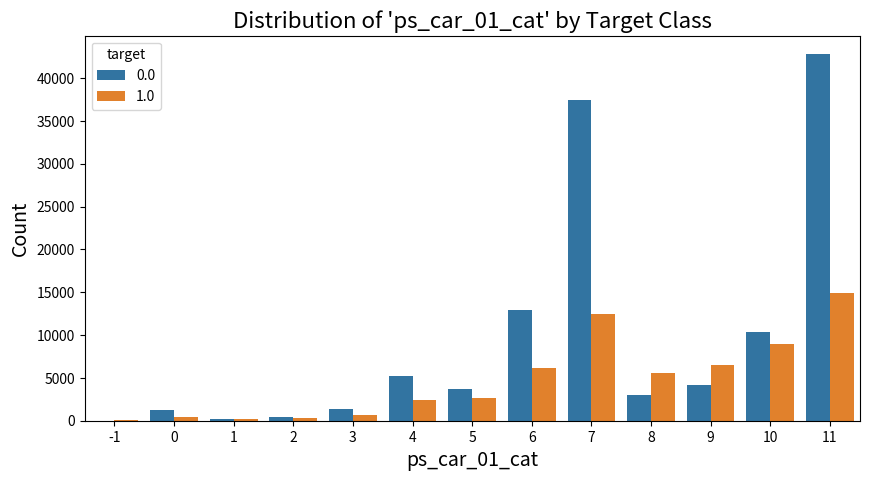

<Figure size 640x480 with 0 Axes>

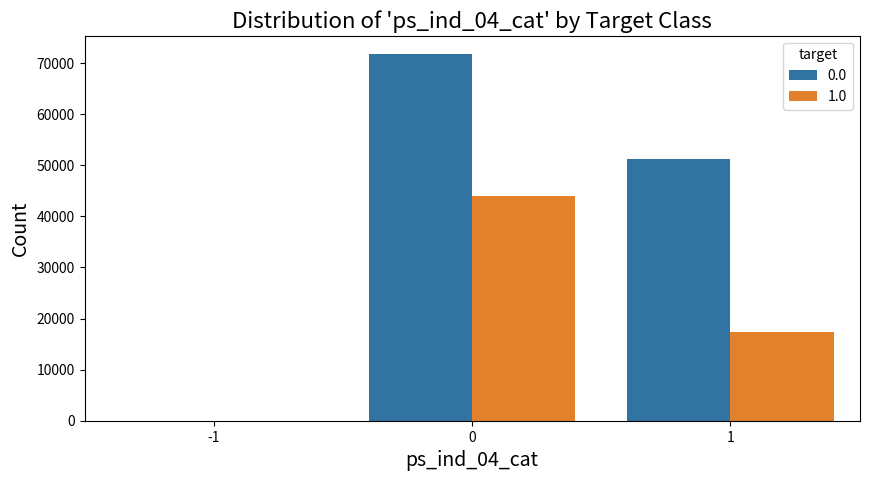

<Figure size 640x480 with 0 Axes>

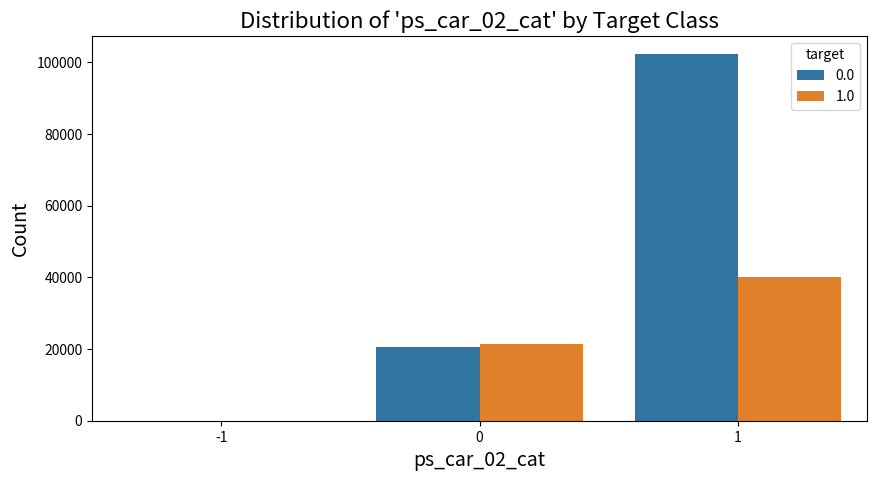

<Figure size 640x480 with 0 Axes>

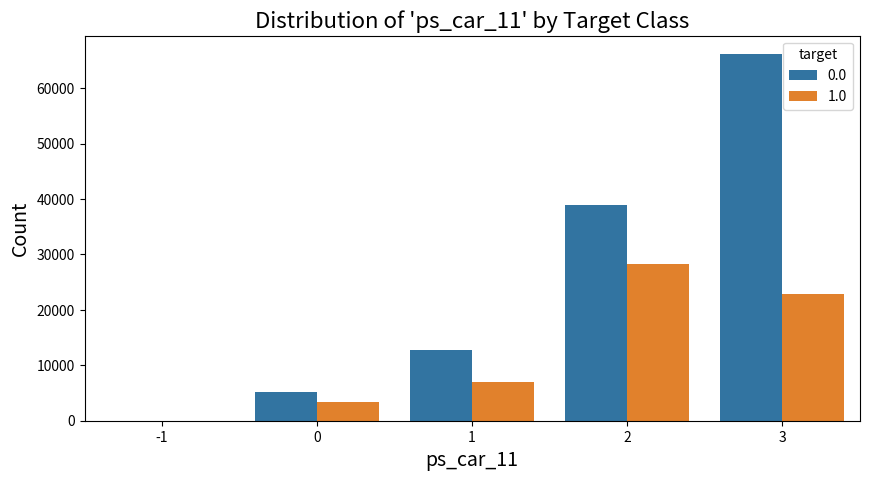

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through categorical variables with missing values
for col in missing_cat_cols:

    # Create a new figure
    plt.figure()

    # Set figure size
    fig, ax = plt.subplots(figsize=(10, 5))

    # Draw countplot with hue as target
    sns.countplot(x=col, hue='target', data=full_set_update)

    # Set axis labels and title
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f"Distribution of '{col}' by Target Class", fontsize=16)

    # Set tick label size
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Display the plot
    plt.show()

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
# 排名前2的变量我们drop掉
cols_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train_balanced_update.drop(cols_to_drop, inplace = True, axis = 1)

- If "<font color=red>mean</font>", then replace missing values using the mean along each column. Can only be used with numeric data.
- If "<font color=red>median</font>", then replace missing values using the median along
  each column. Can only be used with numeric data.
- If "<font color=red>most_frequent</font>", then replace missing using the most frequent
  value along each column. Can be used with strings or numeric data.
  If there is more than one such value, only the smallest is returned.
- If "<font color=red>constant</font>", then replace missing values with fill_value. Can be
  used with strings or numeric data.

In [36]:
mean_imputer = SimpleImputer(missing_values = -1, strategy='mean',add_indicator=True)
mode_imputer = SimpleImputer(missing_values = -1, strategy='most_frequent',add_indicator=True)

In [37]:
full_set_update_copy['ps_reg_03']=[x[0] for x in mode_imputer.fit_transform(full_set_update_copy[['ps_reg_03']]).tolist()]

In [38]:
full_set_update_copy['ps_car_14']=[x[0] for x in mean_imputer.fit_transform(full_set_update_copy[['ps_car_14']]).tolist()]

In [39]:
full_set_update_copy

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0         744529          2              1          9              1   
1         673907          1              1          2              1   
2         730796          7              1          6              0   
3         306142          1              1          3              0   
4        1102701          6              2          7              1   
...          ...        ...            ...        ...            ...   
1077209  1488022          0              1          6              0   
1077210  1488023          5              3          5              1   
1077211  1488024          0              1          5              0   
1077212  1488025          6              1          5              1   
1077213  1488026          7              1          4              1   

         ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                    0              0              0              1   
1                    0              0              1              0   
2                    4              0              0              0   
3                    0              1              0              0   
4                    0              0              1              0   
...                ...            ...            ...            ...   
1077209              0              0              1              0   
1077210              0              0              0              1   
1077211              0              1              0              0   
1077212              0              0              0              0   
1077213              0              0              0              0   

         ps_ind_09_bin  ...  ps_calc_12  ps_calc_13  ps_calc_14  \
0                    0  ...           1           2           8   
1                    0  ...           4           4           9   
2                    1  ...           1           3           7   
3                    0  ...           0           2           9   
4                    0  ...           0           2           9   
...                ...  ...         ...         ...         ...   
1077209              0  ...           2           3           4   
1077210              0  ...           2           2          11   
1077211              0  ...           2           2          11   
1077212              1  ...           1           2           7   
1077213              1  ...           2           2           7   

         ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
0                     0               0               1               0   
1                     1               1               1               1   
2                     0               1               1               0   
3                     0               0               1               0   
4                     0               0               1               1   
...                 ...             ...             ...             ...   
1077209               0               1               0               0   
1077210               0               0               1               1   
1077211               0               1               1               0   
1077212               1               1               0               0   
1077213               0               1               1               1   

         ps_calc_19_bin  ps_calc_20_bin  target  
0                     0               0    0.00  
1                     1               0    0.00  
2                     0               0    0.00  
3                     0               0    0.00  
4                     0               1    0.00  
...                 ...             ...     ...  
1077209               1               0     NaN  
1077210               0               0     NaN  
1077211               0               0     NaN  
1077212               0               0     NaN  
1077213               0               0 

In [45]:
imp = mode_imputer.fit_transform(full_set_update_copy[missing_cat_cols])

In [46]:
full_set_update_copy[missing_cat_cols]=pd.DataFrame(imp).iloc[:,:len(missing_cat_cols)]

In [47]:
full_set_update_copy

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0         744529          2              1          9              1   
1         673907          1              1          2              1   
2         730796          7              1          6              0   
3         306142          1              1          3              0   
4        1102701          6              2          7              1   
...          ...        ...            ...        ...            ...   
1077209  1488022          0              1          6              0   
1077210  1488023          5              3          5              1   
1077211  1488024          0              1          5              0   
1077212  1488025          6              1          5              1   
1077213  1488026          7              1          4              1   

         ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                    0              0              0              1   
1                    0              0              1              0   
2                    4              0              0              0   
3                    0              1              0              0   
4                    0              0              1              0   
...                ...            ...            ...            ...   
1077209              0              0              1              0   
1077210              0              0              0              1   
1077211              0              1              0              0   
1077212              0              0              0              0   
1077213              0              0              0              0   

         ps_ind_09_bin  ...  ps_calc_12  ps_calc_13  ps_calc_14  \
0                    0  ...           1           2           8   
1                    0  ...           4           4           9   
2                    1  ...           1           3           7   
3                    0  ...           0           2           9   
4                    0  ...           0           2           9   
...                ...  ...         ...         ...         ...   
1077209              0  ...           2           3           4   
1077210              0  ...           2           2          11   
1077211              0  ...           2           2          11   
1077212              1  ...           1           2           7   
1077213              1  ...           2           2           7   

         ps_calc_15_bin  ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  \
0                     0               0               1               0   
1                     1               1               1               1   
2                     0               1               1               0   
3                     0               0               1               0   
4                     0               0               1               1   
...                 ...             ...             ...             ...   
1077209               0               1               0               0   
1077210               0               0               1               1   
1077211               0               1               1               0   
1077212               1               1               0               0   
1077213               0               1               1               1   

         ps_calc_19_bin  ps_calc_20_bin  target  
0                     0               0    0.00  
1                     1               0    0.00  
2                     0               0    0.00  
3                     0               0    0.00  
4                     0               1    0.00  
...                 ...             ...     ...  
1077209               1               0     NaN  
1077210               0               0     NaN  
1077211               0               0     NaN  
1077212               0               0     NaN  
1077213               0               0 

In [49]:
full_set_update_copy[missing_cat_cols] = full_set_update_copy[missing_cat_cols].astype('int64')

### 🔍 EDA (Exploratory Data Analysis)

Now we officially begin exploring the dataset.

We will conduct **exploratory data analysis (EDA)** by leveraging the `metadata` DataFrame, which gives us a structured overview of each feature.

The analysis will be organized by **variable types**, allowing us to apply the most appropriate methods to each category:

- **Binary variables**
- **Categorical (nominal/ordinal) variables**
- **Continuous (interval) variables**

Through this, we aim to:
- Understand feature distributions
- Identify outliers and patterns
- Detect missing value structures
- Reveal relationships with the target variable


<Figure size 640x480 with 0 Axes>

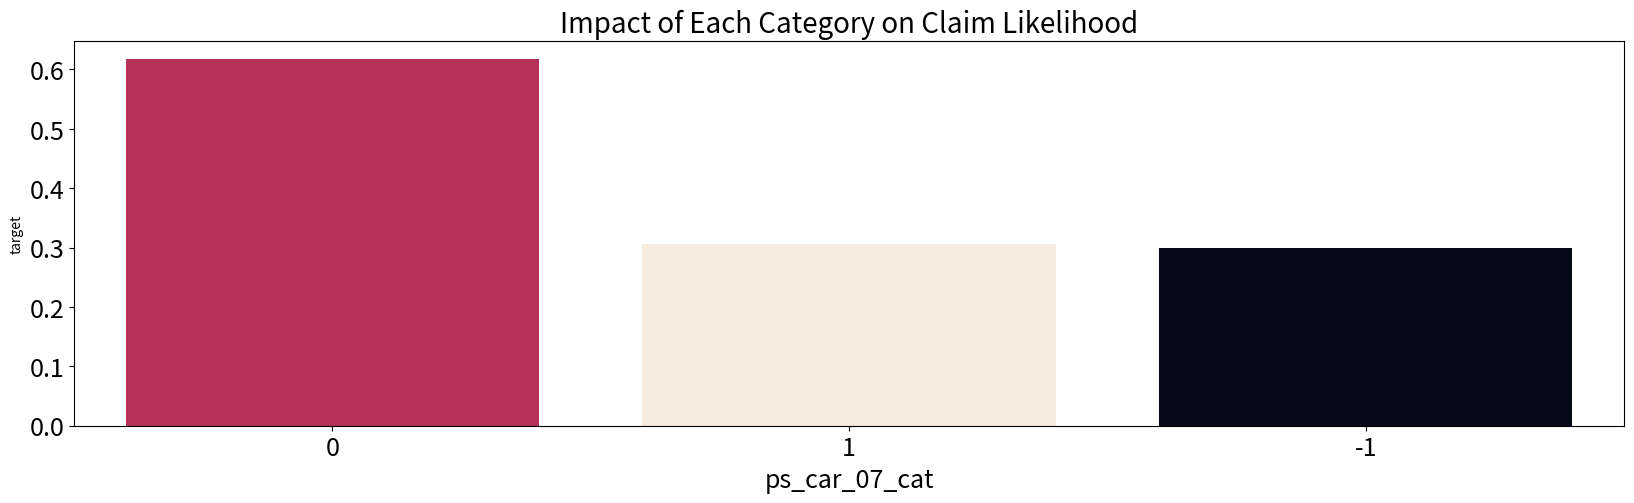

<Figure size 640x480 with 0 Axes>

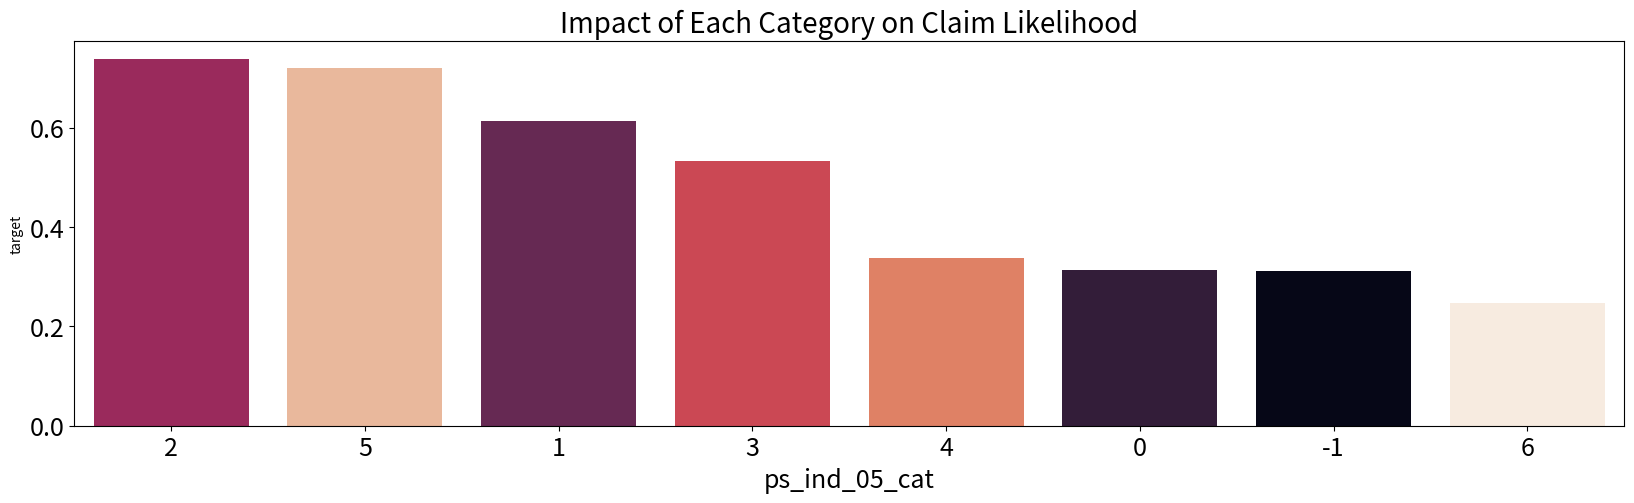

<Figure size 640x480 with 0 Axes>

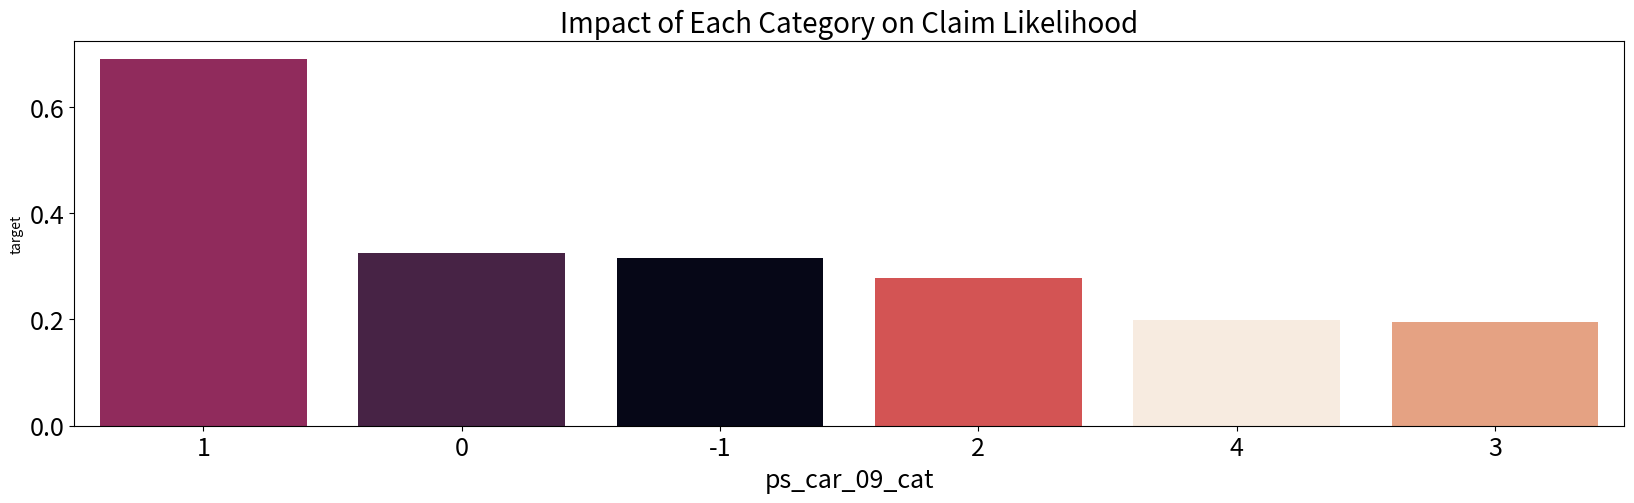

<Figure size 640x480 with 0 Axes>

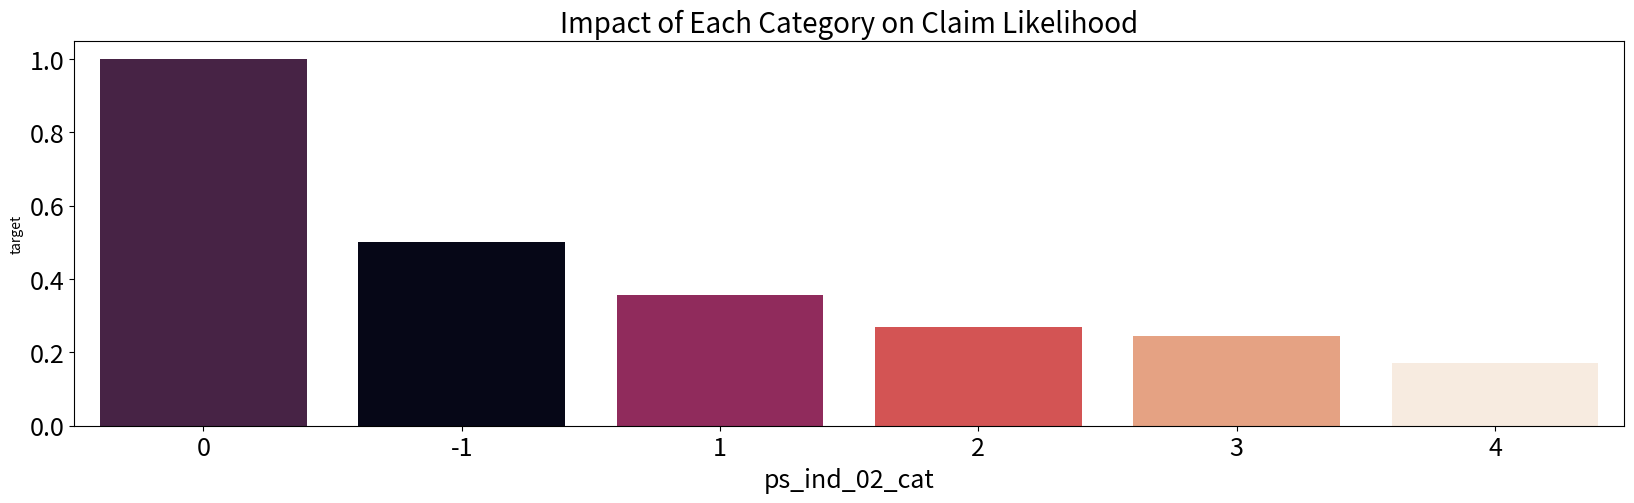

<Figure size 640x480 with 0 Axes>

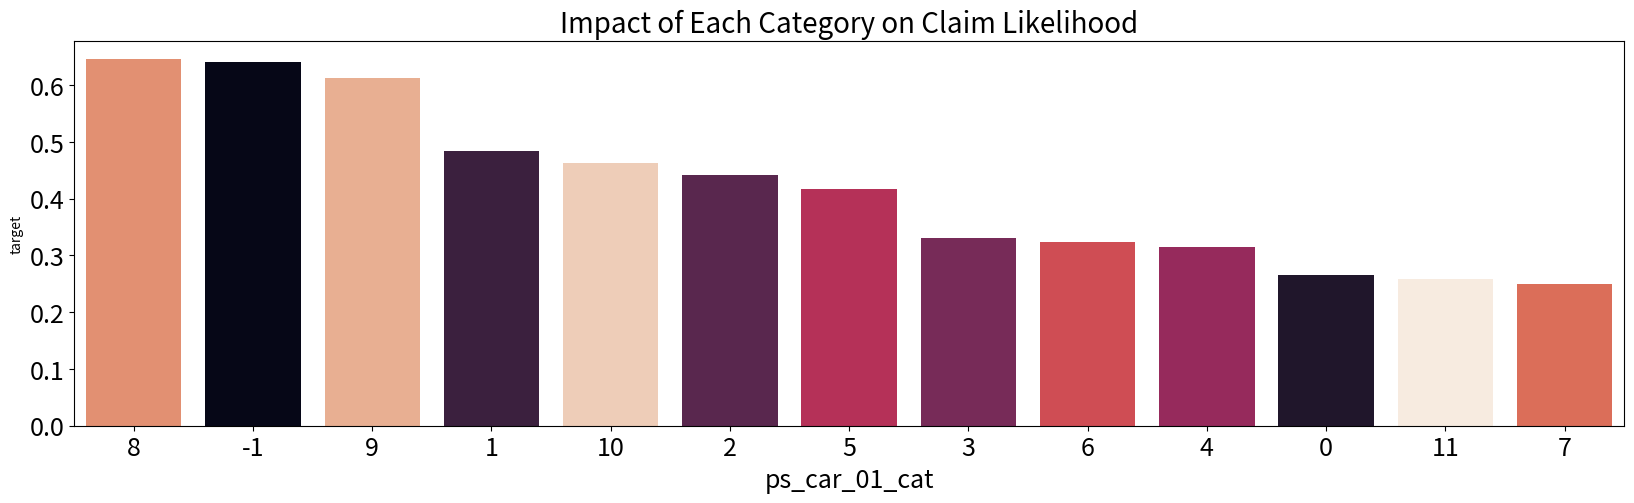

<Figure size 640x480 with 0 Axes>

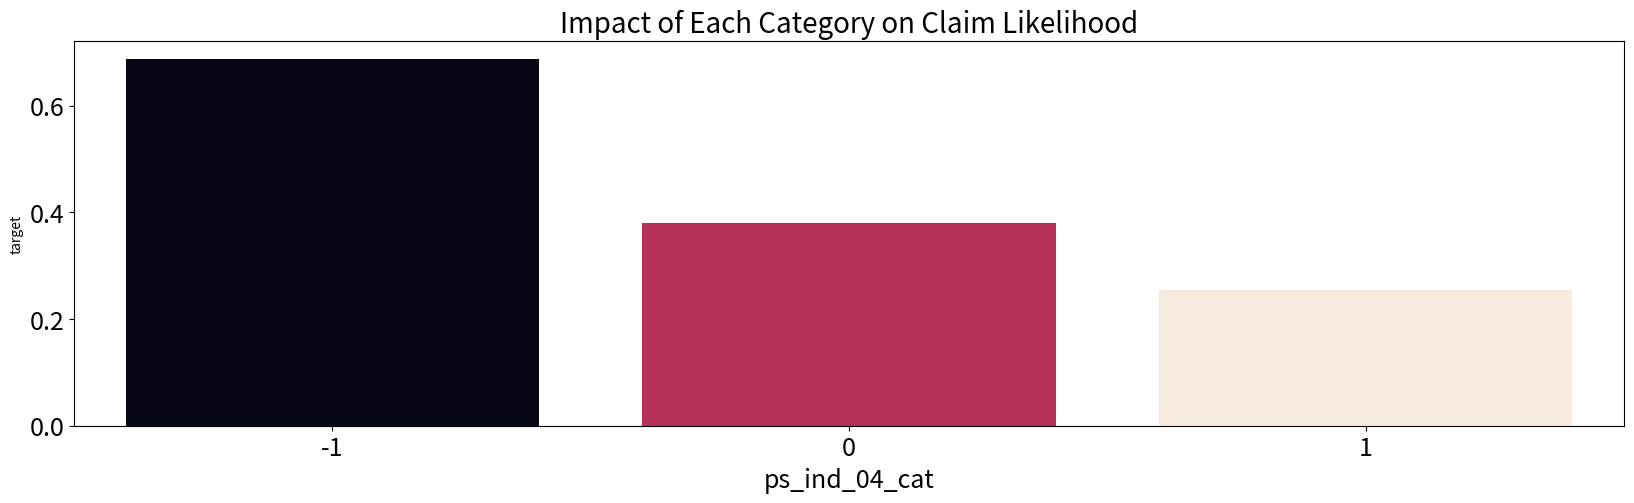

<Figure size 640x480 with 0 Axes>

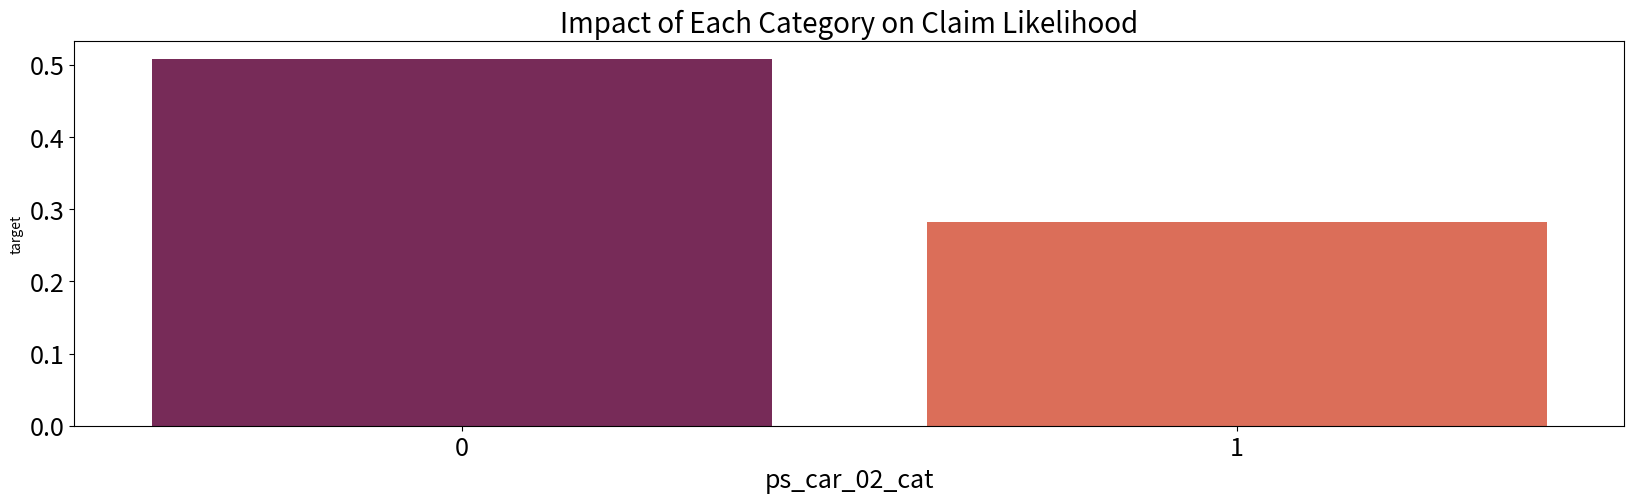

<Figure size 640x480 with 0 Axes>

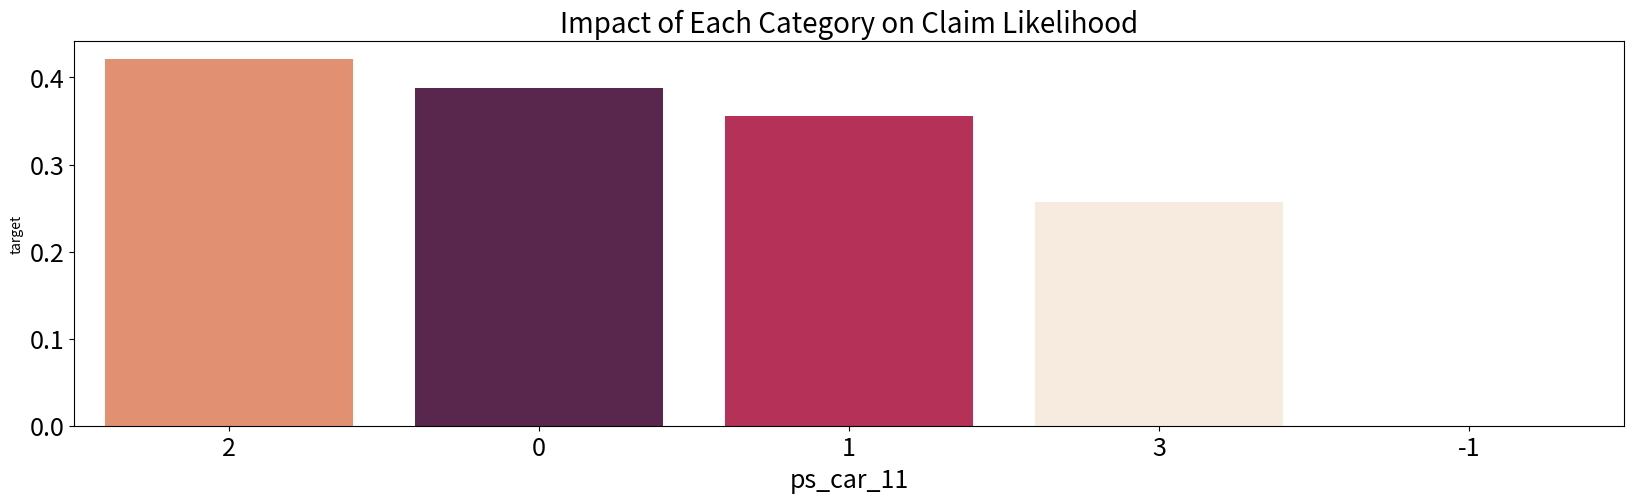

In [52]:
# Visualize how each category of a categorical feature affects the claim rate (target=1)

for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 5))

    # Use the pre-imputation data from the balanced training set
    train_before_imp = full_set_update.loc[train_balanced.index]

    # Calculate the mean target value (claim rate) per category
    cat_perc = train_before_imp[[col, 'target']].groupby([col], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Create a bar plot sorted by target (claim) rate
    sns.barplot(
        ax=ax,
        x=col,
        y='target',
        data=cat_perc,
        order=cat_perc[col],
        hue=col,
        palette='rocket',
        legend=False
    )

    # Set plot labels and title
    plt.title('Impact of Each Category on Claim Likelihood', fontsize=20)
    plt.xlabel(col, fontsize=18)
    # plt.ylabel('Claim Rate', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

    plt.show()


<Figure size 640x480 with 0 Axes>

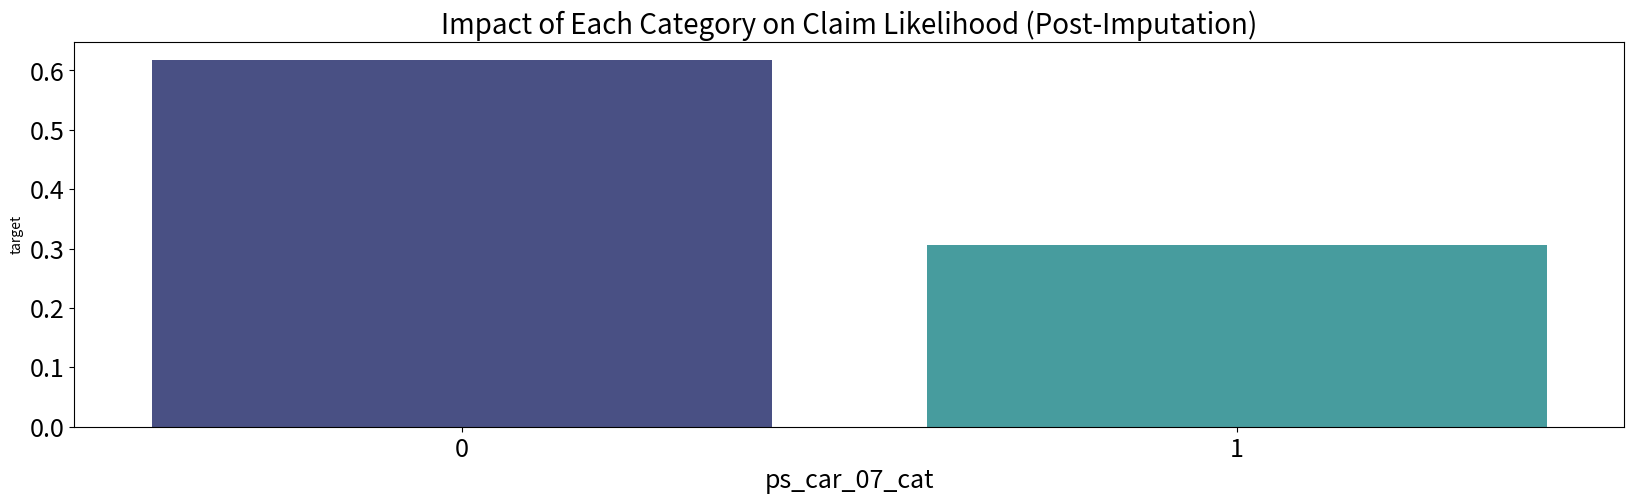

<Figure size 640x480 with 0 Axes>

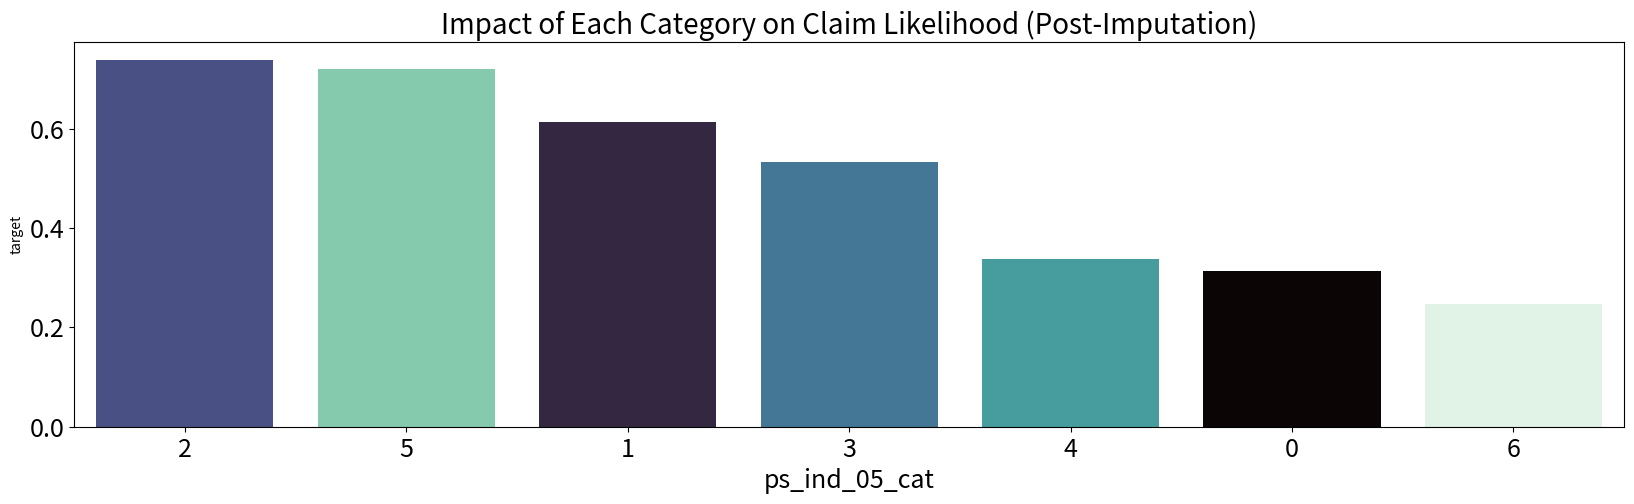

<Figure size 640x480 with 0 Axes>

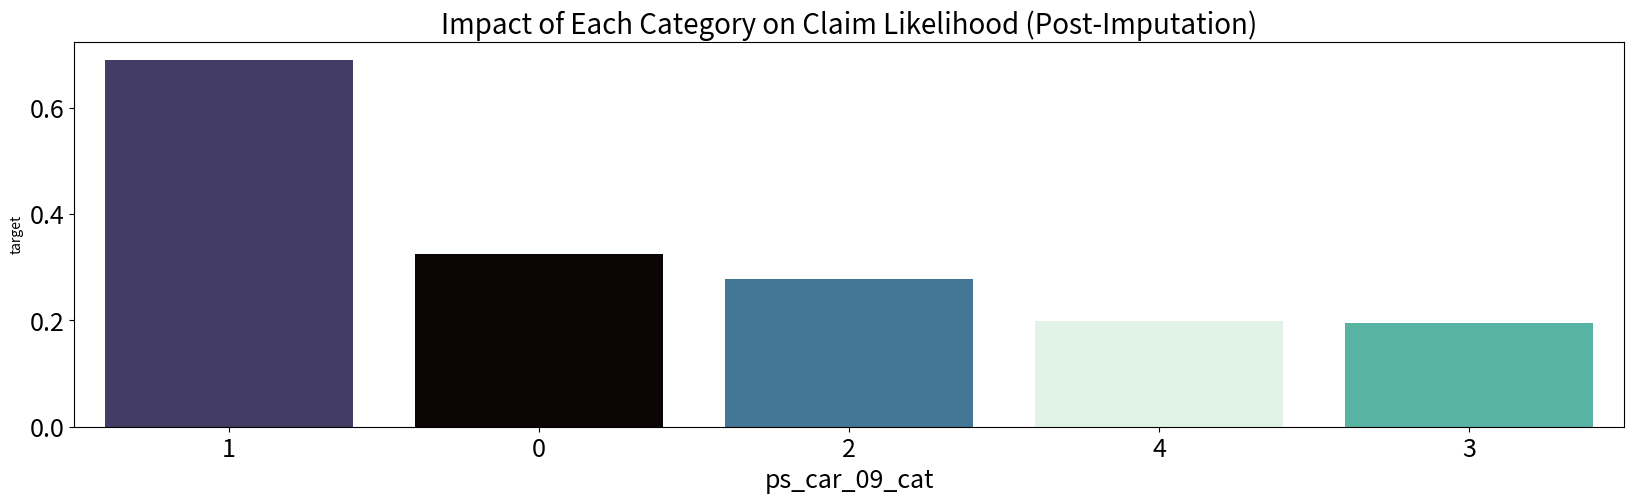

<Figure size 640x480 with 0 Axes>

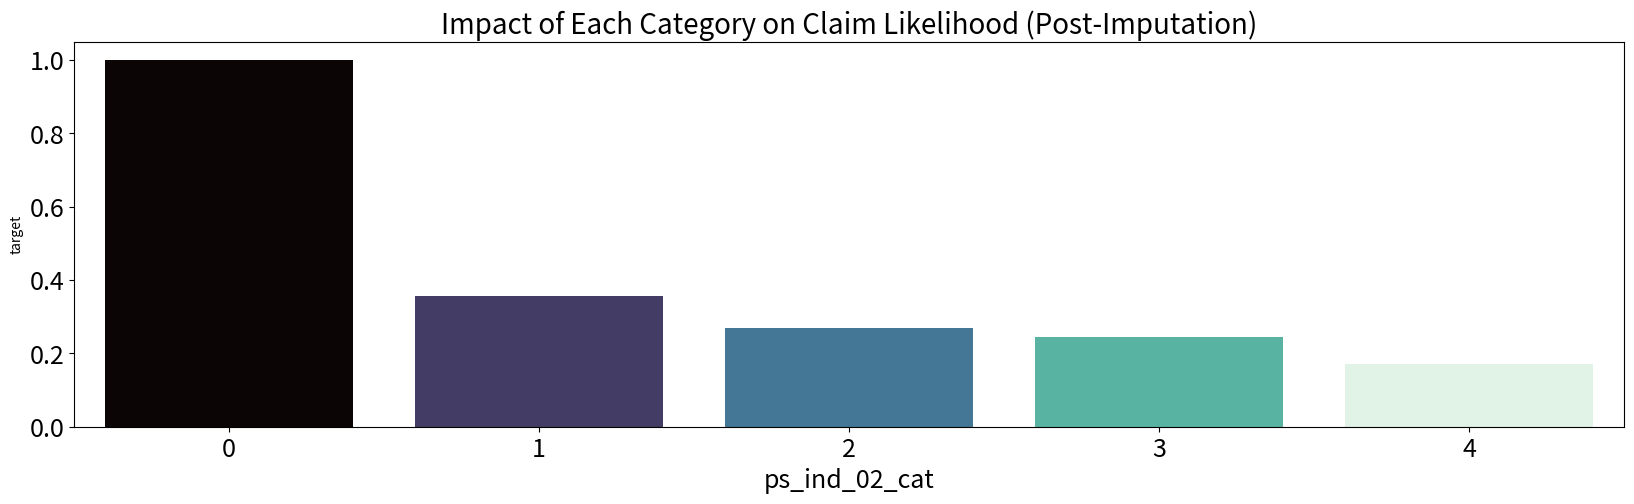

<Figure size 640x480 with 0 Axes>

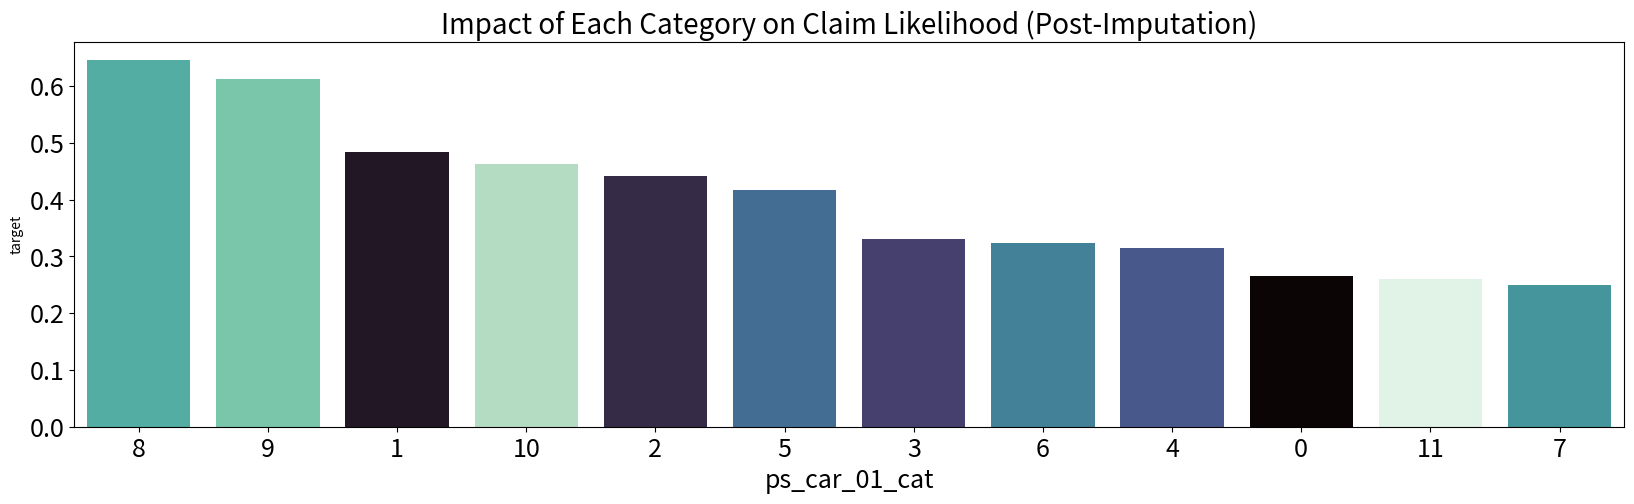

<Figure size 640x480 with 0 Axes>

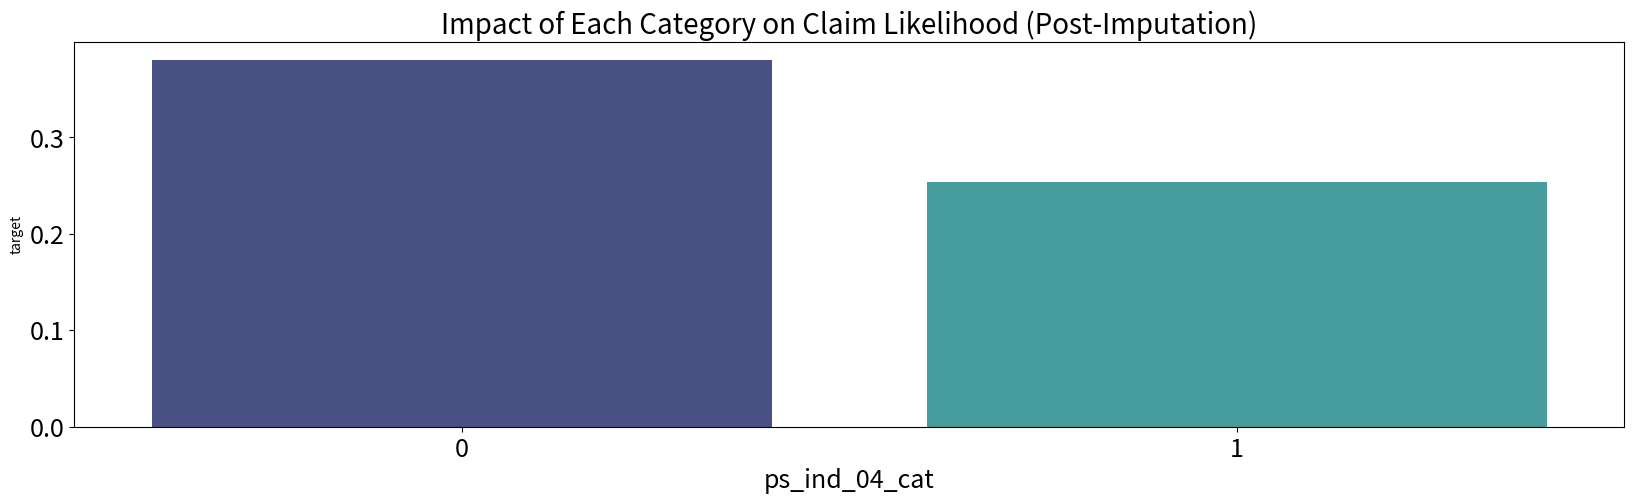

<Figure size 640x480 with 0 Axes>

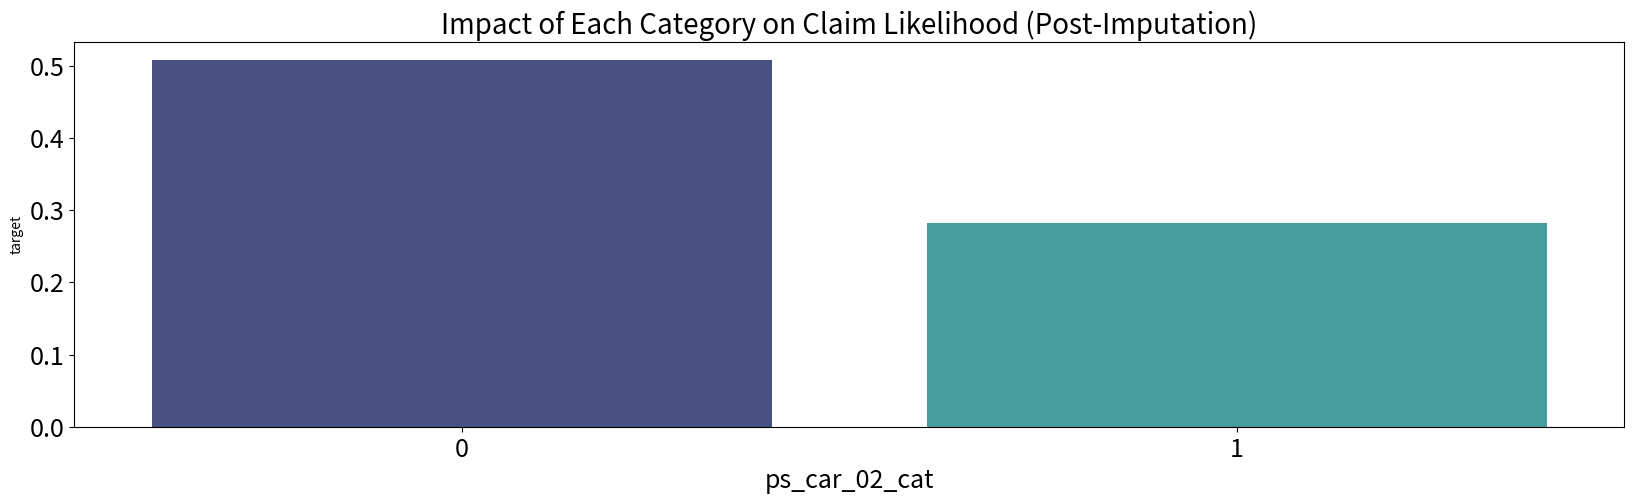

<Figure size 640x480 with 0 Axes>

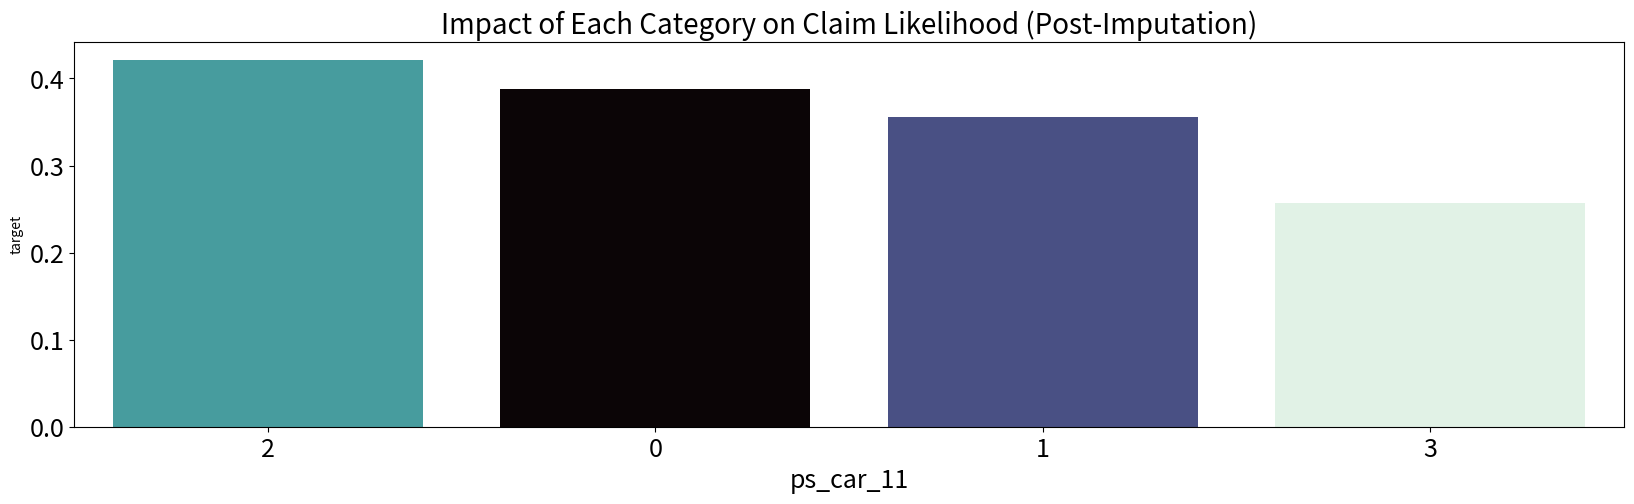

In [53]:
# Visualize the effect of each category (after imputation) on the likelihood of filing a claim

for col in missing_cat_cols:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 5))

    # Use the imputed version of the dataset (after handling missing values)
    train_after_imp = full_set_update_copy.loc[train_balanced.index]

    # Calculate average claim rate (target=1) per category
    cat_perc = train_after_imp[[col, 'target']].groupby([col], as_index=False).mean()

    # Sort categories by their claim rate (descending)
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # Bar plot to show claim rate for each category (after imputation)
    sns.barplot(
        ax=ax,
        x=col,
        y='target',
        data=cat_perc,
        order=cat_perc[col],
        hue=col,
        palette='mako',
        legend=False
    )

    # Set plot title and axis labels
    plt.title('Impact of Each Category on Claim Likelihood (Post-Imputation)', fontsize=20)
    plt.xlabel(col, fontsize=18)
    # plt.ylabel('Claim Rate', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

    plt.show()


In [54]:
full_set_update_copy[missing_cat_cols[:6]]=pd.DataFrame(mode_imputer.inverse_transform(imp)).iloc[:,:6].astype('int64')

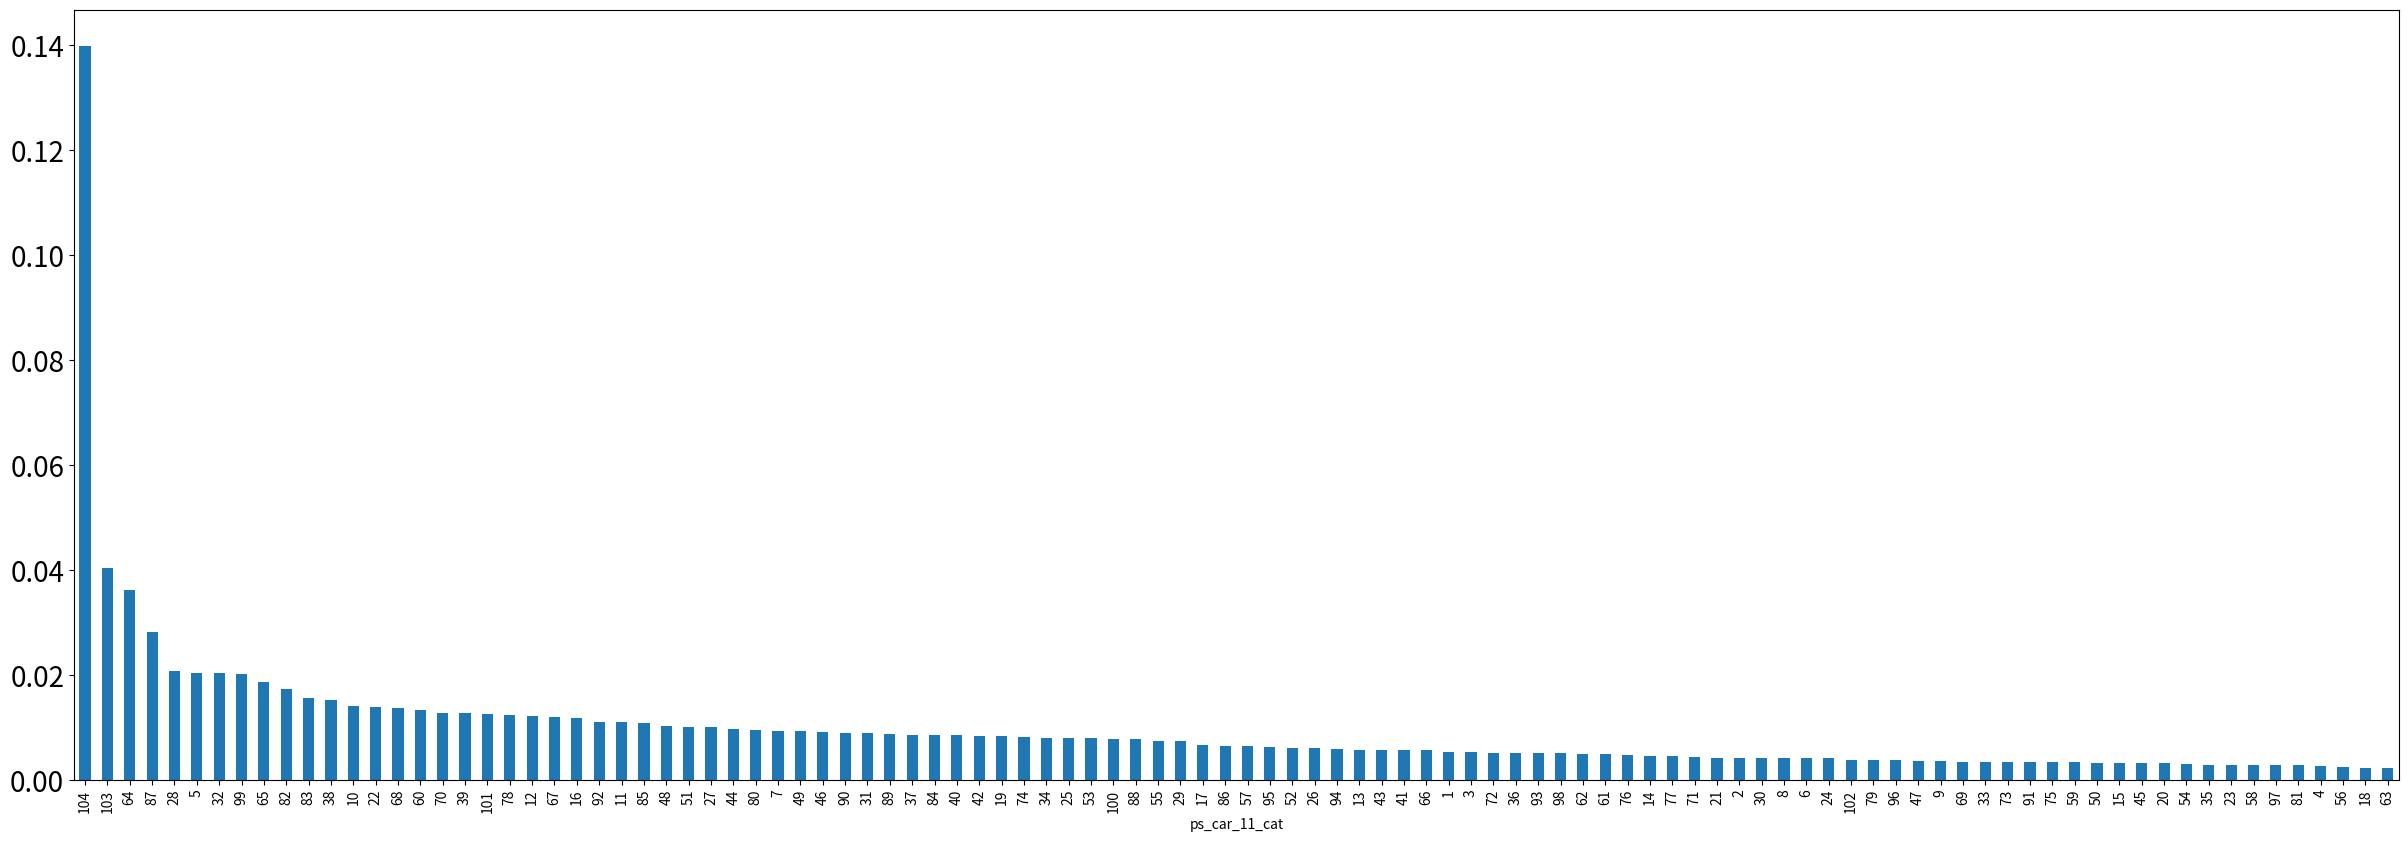

In [55]:
(full_set_update_copy.ps_car_11_cat.value_counts()/full_set_update_copy.shape[0]).plot(kind='bar',figsize = [30,10])
plt.tick_params(axis='y', which='major', labelsize=20)

In [56]:
def add_noise(series, noise_level):
    """Adds Gaussian noise to a series for regularization."""
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(
    trn_series=None,
    tst_series=None,
    target=None,
    min_samples_leaf=1,
    smoothing=1,
    noise_level=0
):
    """
    Performs target encoding for categorical variables with optional smoothing and noise injection.

    Parameters:
    ----------
    trn_series : pd.Series
        Categorical feature in training data.
    tst_series : pd.Series
        Categorical feature in test/validation data.
    target : pd.Series
        The target variable (e.g., 0 or 1).
    min_samples_leaf : int, default=1
        Minimum number of samples required to consider the category mean reliable.
    smoothing : float, default=1
        Smoothing factor to balance the global mean vs category mean.
    noise_level : float, default=0
        Adds Gaussian noise to prevent overfitting.

    Returns:
    -------
    pd.Series (train_encoded), pd.Series (test_encoded)
        Encoded features for train and test sets.
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name

    # Compute mean and count for each category in the training data
    temp = pd.concat([trn_series, target], axis=1)
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Apply smoothing to reduce the impact of small sample categories
    smoothing_factor = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    prior = target.mean()

    # Compute the smoothed target mean per category
    averages[target.name] = prior * (1 - smoothing_factor) + averages["mean"] * smoothing_factor
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # Merge the smoothed means back into the training series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={target.name: 'average'}),
        on=trn_series.name,
        how='left'
    )['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_trn_series.index = trn_series.index

    # Apply the same mapping to the test series
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={target.name: 'average'}),
        on=tst_series.name,
        how='left'
    )['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index

    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [57]:
train_encoded, test_encoded = target_encode(train_balanced["ps_car_11_cat"],
                             test["ps_car_11_cat"],
                             target=train_balanced.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [58]:
train = full_set_update_copy.loc[train_balanced.index]

In [59]:
test = full_set_update_copy.loc[test.index]

In [60]:
train["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test['ps_car_11_cat_tar_enc'] = test_encoded.astype('float64')

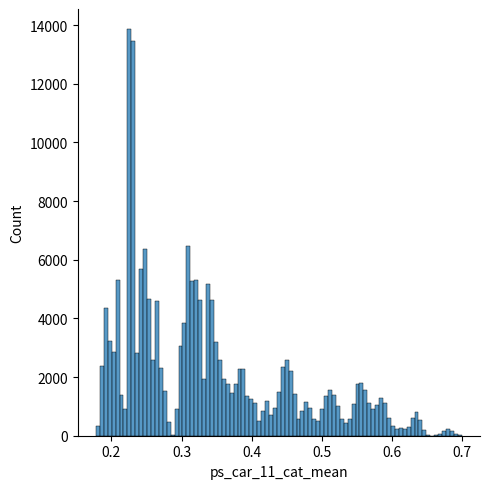

In [61]:
sns.displot(train_encoded)

In [62]:
cols_to_drop.append('ps_car_11_cat')

In [63]:
cols_to_drop

['ps_car_03_cat', 'ps_car_05_cat', 'ps_car_11_cat']

In [64]:
missing_cols

0     ps_car_03_cat
1     ps_car_05_cat
2         ps_reg_03
3         ps_car_14
4     ps_car_07_cat
5     ps_ind_05_cat
6     ps_car_09_cat
7     ps_ind_02_cat
8     ps_car_01_cat
9     ps_ind_04_cat
10    ps_car_02_cat
11        ps_car_11
Name: Feature Name, dtype: object

In [65]:
def meta(raw_data, processed_data=None, cols_to_drop=[], keep_missing=True):
    """
    Generate a structured metadata DataFrame to describe each feature in the dataset.

    Parameters
    ----------
    raw_data : pd.DataFrame
        Original dataset before preprocessing.

    processed_data : pd.DataFrame, optional
        Dataset after preprocessing. If not provided, raw_data will be used.

    cols_to_drop : list
        List of columns to exclude due to high missingness or irrelevance.

    keep_missing : bool, default=True
        If True, retain missing values in unique count; otherwise, treat -1 as NaN.

    Returns
    -------
    meta : pd.DataFrame
        Metadata summary for all columns, including role, type, missing stats, and whether kept.
    """

    data = []
    df = processed_data.copy() if processed_data is not None else raw_data

    for col in df.columns:
        # Define role
        if col == 'target':
            role = 'Target (claim status)'
        elif col == 'id':
            role = 'ID (non-feature)'
        else:
            role = 'Feature'

        # Define variable type
        if 'bin' in col or col == 'target':
            level = 'binary'
        elif col.endswith('cat') or col == 'id':
            level = 'nominal'
        elif df[col].dtype == 'float64':
            range_val = df[col].replace(-1, np.nan).max() - df[col].replace(-1, np.nan).min()
            level = 'interval' if range_val > 1 else 'ratio'
        elif df[col].dtype == 'int64':
            level = 'ordinal'

        # Define whether to keep the column
        keep = not (col == 'id' or col in cols_to_drop)

        # Data type
        dtype = df[col].dtype

        # Unique values
        if col == 'id' or df[col].dtype == 'float64':
            uniq = 'Not Applicable'
        else:
            if keep_missing:
                uniq = raw_data[col].nunique()
            else:
                uniq = raw_data[col].replace({-1: np.nan}).nunique()

        # Missing values
        n_missing = sum(df[col] == -1)
        missing = f'{n_missing} ({round(n_missing * 100 / len(raw_data), 2)}%)'

        col_dict = {
            'Feature Name': col,
            'Role': role,
            'Variable Type': level,
            'Data Type': dtype,
            'Keep': keep,
            '# Unique Values': uniq,
            'Missing Values': missing
        }
        data.append(col_dict)

    meta_df = pd.DataFrame(data, columns=list(col_dict.keys()))
    meta_df.set_index('Feature Name', inplace=True)

    # Determine how missing values were handled
    missing_cols = [col for col in raw_data.columns if raw_data[col].min() == -1]
    meta_df['Missing Handling'] = [
        'No Missing' if col not in missing_cols
        else 'Dropped' if col in cols_to_drop
        else 'Kept as Missing' if meta_df.loc[col, 'Missing Values'].startswith('0') is False
        else 'Imputed'
        for col in meta_df.index
    ]

    return meta_df


In [66]:
final_meta = meta(raw_data = full_set_update,
                  processed_data = full_set_update_copy,
                  cols_to_drop = cols_to_drop,
                  keep_missing = True)
final_meta

Role Variable Type Data Type   Keep  \
Feature Name                                                           
id                   ID (non-feature)       nominal     int64  False   
ps_ind_01                     Feature       ordinal     int64   True   
ps_ind_02_cat                 Feature       nominal     int64   True   
ps_ind_03                     Feature       ordinal     int64   True   
ps_ind_04_cat                 Feature       nominal     int64   True   
ps_ind_05_cat                 Feature       nominal     int64   True   
ps_ind_06_bin                 Feature        binary     int64   True   
ps_ind_07_bin                 Feature        binary     int64   True   
ps_ind_08_bin                 Feature        binary     int64   True   
ps_ind_09_bin                 Feature        binary     int64   True   
ps_ind_10_bin                 Feature        binary     int64   True   
ps_ind_11_bin                 Feature        binary     int64   True   
ps_ind_12_bin                 Feature        binary     int64   True   
ps_ind_13_bin                 Feature        binary     int64   True   
ps_ind_14                     Feature       ordinal     int64   True   
ps_ind_15                     Feature       ordinal     int64   True   
ps_ind_16_bin                 Feature        binary     int64   True   
ps_ind_17_bin                 Feature        binary     int64   True   
ps_ind_18_bin                 Feature        binary     int64   True   
ps_reg_01                     Feature         ratio   float64   True   
ps_reg_02                     Feature      interval   float64   True   
ps_reg_03                     Feature      interval   float64   True   
ps_car_01_cat                 Feature       nominal     int64   True   
ps_car_02_cat                 Feature       nominal     int64   True   
ps_car_03_cat                 Feature       nominal     int64  False   
ps_car_04_cat                 Feature       nominal     int64   True   
ps_car_05_cat                 Feature       nominal     int64  False   
ps_car_06_cat                 Feature       nominal     int64   True   
ps_car_07_cat                 Feature       nominal     int64   True   
ps_car_08_cat                 Feature       nominal     int64   True   
ps_car_09_cat                 Feature       nominal     int64   True   
ps_car_10_cat                 Feature       nominal     int64   True   
ps_car_11_cat                 Feature       nominal     int64  False   
ps_car_11                     Feature       ordinal     int64   True   
ps_car_12                     Feature      interval   float64   True   
ps_car_13                     Feature      interval   float64   True   
ps_car_14                     Feature      interval   float64   True   
ps_car_15                     Feature      interval   float64   True   
ps_calc_01                    Feature         ratio   float64   True   
ps_calc_02                    Feature         ratio   float64   True   
ps_calc_03                    Feature         ratio   float64   True   
ps_calc_04                    Feature       ordinal     int64   True   
ps_calc_05                    Feature       ordinal     int64   True   
ps_calc_06                    Feature       ordinal     int64   True   
ps_calc_07                    Feature       ordinal     int64   True   
ps_calc_08                    Feature       ordinal     int64   True   
ps_calc_09                    Feature       ordinal     int64   True   
ps_calc_10                    Feature       ordinal     int64   True   
ps_calc_11                    Feature       ordinal     int64   True   
ps_calc_12                    Feature       ordinal     int64   True   
ps_calc_13                    Feature       ordinal     int64   True   
ps_calc_14                    Feature       ordinal     int64   True   
ps_calc_15_bin                Feature        binary     int64   True   
ps_calc_16_bin                Feature        binary     int64   True   
p

In [67]:
# 📁 Define path to save the metadata CSV
import os

data_folder = './data'

# Check if the data folder exists; if not, create it
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Compose the full file path for saving
file_path = os.path.join(data_folder, 'final_meta.csv')

# Save the metadata DataFrame to a CSV file
final_meta.to_csv(file_path)

In [68]:
train.to_csv('./data/train_df.csv')
test.to_csv('./data/test_df.csv')

## 🛠️ Feature Engineering & Modeling


In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [71]:
train = pd.read_csv('./data/train_df.csv',index_col=0,dtype={'id': np.int32, 'target': np.int8})

In [73]:
test = pd.read_csv('./data/test_df.csv',index_col=0,dtype={'id': np.int32})

In [74]:
test.drop('target',axis=1,inplace=True)

In [75]:
full_set = pd.concat([train,test],ignore_index=True)

In [76]:
final_meta = pd.read_csv('./data/final_meta.csv',index_col=0)

In [77]:
final_meta[
    ((final_meta['Variable Type'] == 'interval') | (final_meta['Variable Type'] == 'ratio')) &
    (final_meta['Keep'] == True)
]

Role Variable Type Data Type  Keep # Unique Values  \
Feature Name                                                          
ps_reg_01     Feature         ratio   float64  True  Not Applicable   
ps_reg_02     Feature      interval   float64  True  Not Applicable   
ps_reg_03     Feature      interval   float64  True  Not Applicable   
ps_car_12     Feature      interval   float64  True  Not Applicable   
ps_car_13     Feature      interval   float64  True  Not Applicable   
ps_car_14     Feature      interval   float64  True  Not Applicable   
ps_car_15     Feature      interval   float64  True  Not Applicable   
ps_calc_01    Feature         ratio   float64  True  Not Applicable   
ps_calc_02    Feature         ratio   float64  True  Not Applicable   
ps_calc_03    Feature         ratio   float64  True  Not Applicable   

             Missing Values Missing Handling  
Feature Name                                  
ps_reg_01          0 (0.0%)       No Missing  
ps_reg_02          0 (0.0%)       No Missing  
ps_reg_03          0 (0.0%)          Imputed  
ps_car_12          0 (0.0%)       No Missing  
ps_car_13          0 (0.0%)       No Missing  
ps_car_14          0 (0.0%)          Imputed  
ps_car_15          0 (0.0%)       No Missing  
ps_calc_01         0 (0.0%)       No Missing  
ps_calc_02         0 (0.0%)       No Missing  
ps_calc_03         0 (0.0%)       No Missing

In [78]:
continuous_cols = final_meta[
    ((final_meta['Variable Type'] == 'interval') | (final_meta['Variable Type'] == 'ratio')) &
    (final_meta['Keep'] == True)
].index.tolist()


In [79]:
corr_mat = full_set[continuous_cols].corr()

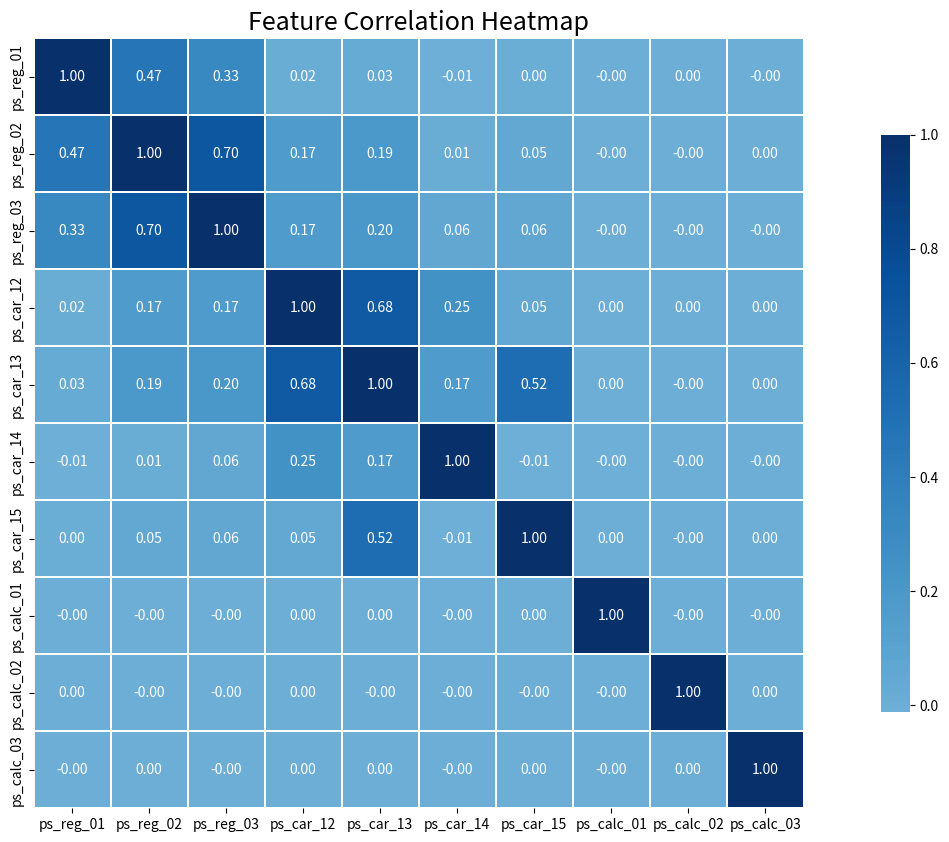

In [81]:
# 📊 Heatmap of correlation matrix

plt.figure(figsize=[20, 10])  # Set figure size

sns.heatmap(
    data=corr_mat,            # Correlation matrix
    vmax=1,                   # Maximum value for color scale
    center=0,                 # Center of the diverging colormap
    square=True,              # Force square cells
    annot=True,               # Show correlation values
    fmt='.2f',                # Format to 2 decimal places
    cmap='Blues',             # Color palette
    linewidths=0.3,           # Width of grid lines
    cbar_kws={"shrink": 0.75} # Shrink the color bar
)

plt.title('Feature Correlation Heatmap', fontsize=18)
plt.show()


> **Note:** The darker the color, the stronger the correlation between two features!

Keep in mind that:
- The diagonal values are all `1` because each feature is perfectly correlated with itself.
- These diagonal cells can be ignored when analyzing feature relationships.


In [84]:
from sklearn.preprocessing import PolynomialFeatures

# Generate pairwise interaction features (no polynomial terms, no bias column)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create interaction terms for continuous variables
interactions = pd.DataFrame(
    data=poly.fit_transform(full_set[continuous_cols]),
    columns=poly.get_feature_names_out(continuous_cols)
)

# Drop original features to retain only the interaction terms
interactions.drop(columns=continuous_cols, inplace=True)

# Print shape before concatenation
print(f'Before interaction: the dataset has {full_set.shape[1]} features.')

# Concatenate interaction terms to the original dataset
full_set = pd.concat([full_set, interactions], axis=1)

# Print shape after concatenation
print(f'After interaction: the dataset has {full_set.shape[1]} features.')

Before interaction: the dataset has 60 features.
After interaction: the dataset has 105 features.


In [85]:
# Get nominal features to retain
nominal_cols = final_meta[
    (final_meta['Variable Type'] == 'nominal') & (final_meta['Keep'] == True)
].index.tolist()

In [86]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
# selector.fit(full_set.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables


selector.fit(full_set.drop(['id', 'target'] + [col for col in full_set.columns if 'woe' in col], axis=1))

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = full_set.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

8 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14', 'ps_car_12 ps_car_14']


In [87]:
from xgboost import XGBClassifier
from xgboost import plot_importance



plt.figure(figsize = [100,20])

X = full_set.loc[train.index].drop(['id', 'target'], axis=1)
y = full_set.loc[train.index].target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Figure size 10000x2000 with 0 Axes>

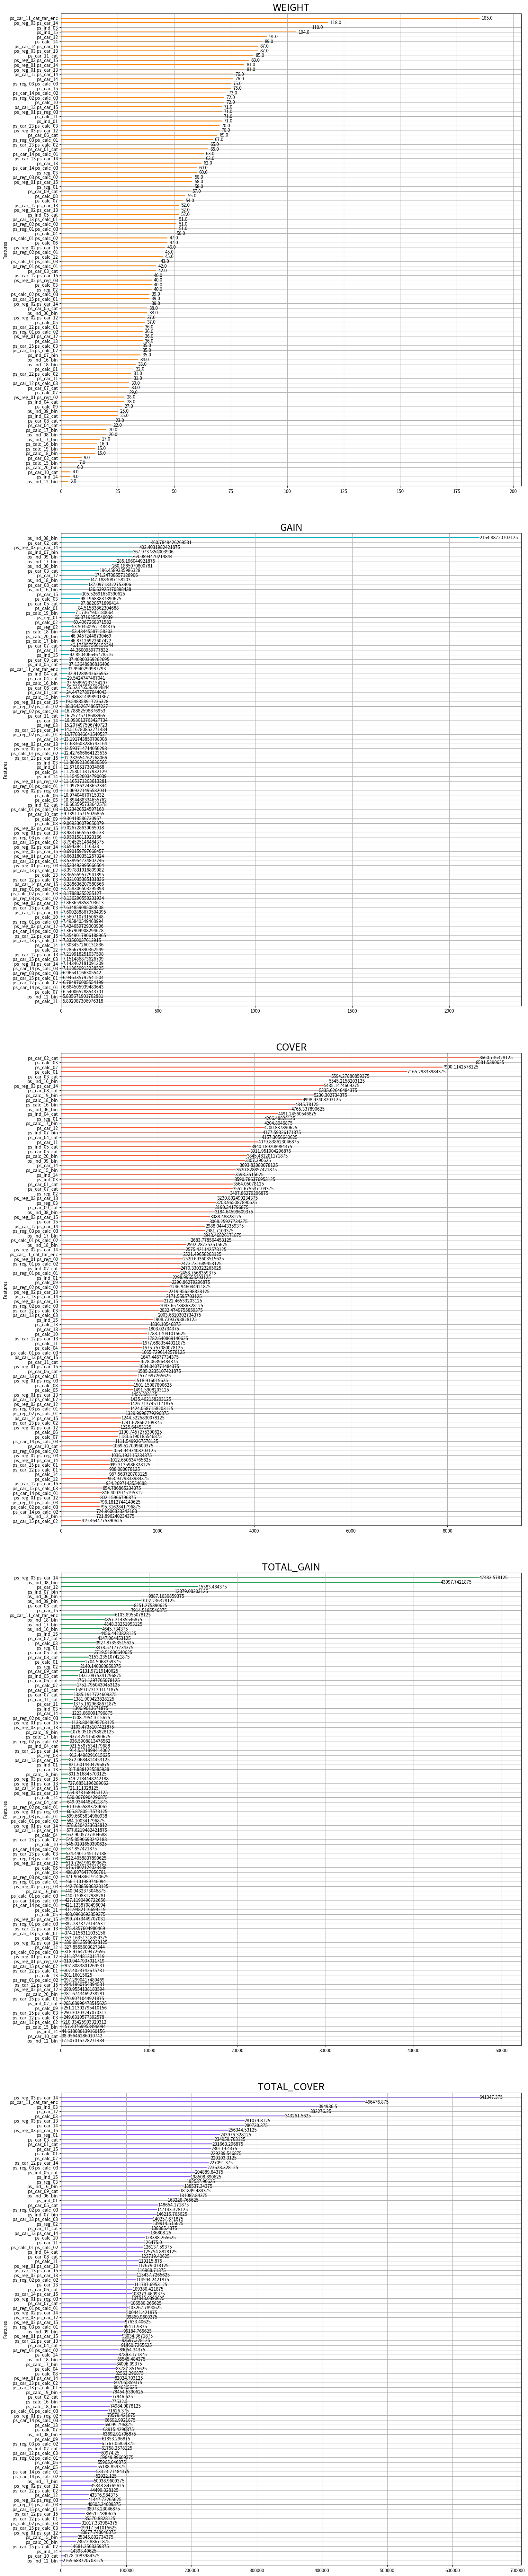

In [89]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

### 📊 Feature Importance Metrics in Tree-Based Models

Tree-based models (e.g., XGBoost, LightGBM) offer several ways to evaluate the importance of features used during training. The three most commonly used metrics are:

---

#### 🔹 **Gain**
- **Definition:** Gain represents the **relative contribution of a feature** to the model.
- It is calculated based on the **improvement in accuracy** brought by a feature to each split in the trees.
- **Higher gain** means the feature is more useful in making predictions.
- ✅ **Most relevant metric** for explaining feature importance.

---

#### 🔹 **Coverage**
- **Definition:** Coverage measures the **relative number of observations** affected by a feature.
- For example, if feature1 is used in tree1, tree2, and tree3 to split 10, 5, and 2 observations respectively, its total coverage is `10 + 5 + 2 = 17`.
- This is then normalized as a percentage across all features.
- It tells us **how broadly** the feature influences decisions across the dataset.

---

#### 🔹 **Weight (Frequency)**
- **Definition:** Weight counts the **number of times a feature is used to split** across all trees.
- In the earlier example, if feature1 is used in 2 splits in tree1, 1 split in tree2, and 3 splits in tree3, then its total weight is `2 + 1 + 3 = 6`.
- The frequency is shown as a **percentage of total splits across all features**.
- Indicates how **frequently** a feature is considered by the model, regardless of the quality of the split.

---

> ✅ **Summary**:
- Use **Gain** when you want to know which features most improve model accuracy.
- Use **Coverage** when you want to understand how many samples are affected by a feature.
- Use **Weight** when you're interested in how often a feature appears in splits, even if it doesn’t contribute significantly to performance.

In [90]:
# Dictionary to store selected feature names for each threshold strategy
feat_dict = {}

# Loop through different selection thresholds
for thres in ['median', 'mean', '1.25*mean']:
    # Select features based on importance threshold
    model_select = SelectFromModel(model, threshold=thres, prefit=True)

    # Print number of features before and after selection
    print(f'Total features before selection: {X.shape[1]}')
    n_features = model_select.transform(X.values).shape[1]
    print(f'Total features after selection ({thres}): {n_features}')
    print('#' * 60)

    # Get list of selected feature names
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

Total features before selection: 103
Total features after selection (median): 52
############################################################
Total features before selection: 103
Total features after selection (mean): 17
############################################################
Total features before selection: 103
Total features after selection (1.25*mean): 16
############################################################


In [91]:
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())


In [92]:
final_train = full_set.loc[train.index][feat_dict['mean']+['target']]

In [93]:
final_test = full_set.loc[test.index][feat_dict['mean']]

In [94]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1996)

In [95]:
from xgboost import XGBClassifier

# 📌 Tuned hyperparameters (based on prior optimization results)
MAX_ROUNDS = 400                   # Maximum number of boosting rounds
OPTIMIZE_ROUNDS = False            # If using early stopping, set to True
LEARNING_RATE = 0.07               # Step size shrinkage
EARLY_STOPPING_ROUNDS = 50         # Early stopping criteria (used with validation set)

# Initialize the XGBoost model with tuned parameters
model = XGBClassifier(
    n_estimators=MAX_ROUNDS,       # Total number of boosting rounds
    max_depth=4,                   # Maximum depth of a tree
    objective="binary:logistic",   # Binary classification with logistic loss
    learning_rate=LEARNING_RATE,   # Learning rate
    subsample=0.8,                 # Subsample ratio of the training instances
    min_child_weight=6,            # Minimum sum of instance weight needed in a child
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    scale_pos_weight=1.6,          # Weighting for positive class due to class imbalance
    gamma=10,                      # Minimum loss reduction to make a further partition
    reg_alpha=8,                   # L1 regularization term on weights
    reg_lambda=1.3                 # L2 regularization term on weights
)


In [96]:
import numpy as np
import pandas as pd

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(trn_series=None,    # Revised to encode validation series
                  val_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    """
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_val_series = pd.merge(
        val_series.to_frame(val_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=val_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_val_series.index = val_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_val_series, noise_level), add_noise(ft_tst_series, noise_level)

In [101]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def XGB_aucroc(df_train, tar_enc=True, pca=False):
    '''
    df_train: preprocessed training data
    tar_enc: whether to apply target encoding to categorical variables
    pca: whether to apply PCA (not implemented here)
    '''
    y = df_train.target
    X = df_train.drop('target', axis=1)
    y_valid_pred = 0 * y
    y_test_pred = 0
    train = pd.concat([X, y], axis=1)
    kf = KFold(n_splits=K, shuffle=True, random_state=42)

    # Lists to store AUC-ROC and PR curve metrics for each fold
    tprs = []
    aucs = []
    precisions = []
    recalls = []
    auprcs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train_index, test_index) in enumerate(kf.split(train)):
        # Split into train, validation, and test sets
        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index, :].copy(), X.iloc[test_index, :].copy()
        X_test = final_test.copy()
        print(f"\nFold {i} cross-validation: ")

        if tar_enc == True:
            f_cat = [f for f in X.columns if '_cat' in f and 'tar_enc' not in f]
            for f in f_cat:
                X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                    trn_series=X_train[f],
                    val_series=X_valid[f],
                    tst_series=X_test[f],
                    target=y_train,
                    min_samples_leaf=100,
                    smoothing=10,
                    noise_level=0
                )
            X_train.drop(f_cat, axis=1, inplace=True)
            X_valid.drop(f_cat, axis=1, inplace=True)
            X_test.drop(f_cat, axis=1, inplace=True)

        # Train XGBoost for current fold
        if OPTIMIZE_ROUNDS:
            eval_set = [(X_valid, y_valid)]
            fit_model = model.fit(X_train, y_train,
                                  eval_set=eval_set,
                                  early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                  verbose=False)
            print("  Best N trees = ", model.best_ntree_limit)
        else:
            fit_model = model.fit(X_train, y_train)

        # Predict on validation set
        pred = fit_model.predict_proba(X_valid)[:, 1]
        fpr, tpr, _ = roc_curve(y_valid, pred)
        precision, recall, _ = precision_recall_curve(y_valid, pred)
        roc_auc = auc(fpr, tpr)
        auprc = average_precision_score(y_valid, pred)
        print("  AUC-ROC = ", roc_auc)
        print("  AUPRC = ", auprc)
        y_valid_pred.iloc[test_index] = pred

        # Accumulate test predictions
        y_test_pred += fit_model.predict_proba(X_test)[:, 1]

        # Store ROC and PR metrics
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)
        precisions.append(precision)
        recalls.append(recall)
        auprcs.append(auprc)

        del X_test, X_train, X_valid, y_train

    y_test_pred /= K  # Average predictions across folds

    # Compute full training set AUC-ROC and AUPRC
    final_fpr, final_tpr, _ = roc_curve(y, y_valid_pred)
    final_roc_auc = auc(final_fpr, final_tpr)
    final_precision, final_recall, _ = precision_recall_curve(y, y_valid_pred)
    final_auprc = average_precision_score(y, y_valid_pred)
    print("\nFull training set (combined) AUC-ROC and AUPRC:")
    print("  final AUC-ROC = ", final_roc_auc)
    print("  final AUPRC = ", final_auprc)

    # Plot AUC-ROC curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC')
    plt.legend(loc="lower right")

    # Plot PR curve
    plt.subplot(1, 2, 2)
    for i in range(K):
        plt.plot(recalls[i], precisions[i], lw=1, alpha=0.3,
                 label='Fold %d (AUPRC = %0.2f)' % (i, auprcs[i]))
    plt.plot(final_recall, final_precision, color='b',
             label=r'Final PR (AUPRC = %0.2f)' % final_auprc,
             lw=2, alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

    return y_test_pred, final_roc_auc, final_auprc


Fold 0 cross-validation: 
  AUC-ROC =  0.8527834253313686
  AUPRC =  0.8483441472236788

Fold 1 cross-validation: 
  AUC-ROC =  0.855154060202433
  AUPRC =  0.8489857306749411

Fold 2 cross-validation: 
  AUC-ROC =  0.8597130133857933
  AUPRC =  0.8519575773925461

Fold 3 cross-validation: 
  AUC-ROC =  0.8516426472063141
  AUPRC =  0.8431753599380127

Fold 4 cross-validation: 
  AUC-ROC =  0.8589403664865674
  AUPRC =  0.8492898959587147

Fold 5 cross-validation: 
  AUC-ROC =  0.8542648939072102
  AUPRC =  0.8443876794079261

Fold 6 cross-validation: 
  AUC-ROC =  0.8583759092410354
  AUPRC =  0.8499395977968862

Fold 7 cross-validation: 
  AUC-ROC =  0.8540951657831201
  AUPRC =  0.8423161931756333

Fold 8 cross-validation: 
  AUC-ROC =  0.8567458498317588
  AUPRC =  0.848656546581523

Fold 9 cross-validation: 
  AUC-ROC =  0.8530110969882208
  AUPRC =  0.8463479514274088

Full training set (combined) AUC-ROC and AUPRC:
  final AUC-ROC =  0.8554385816674025
  final AUPRC =  0.847317

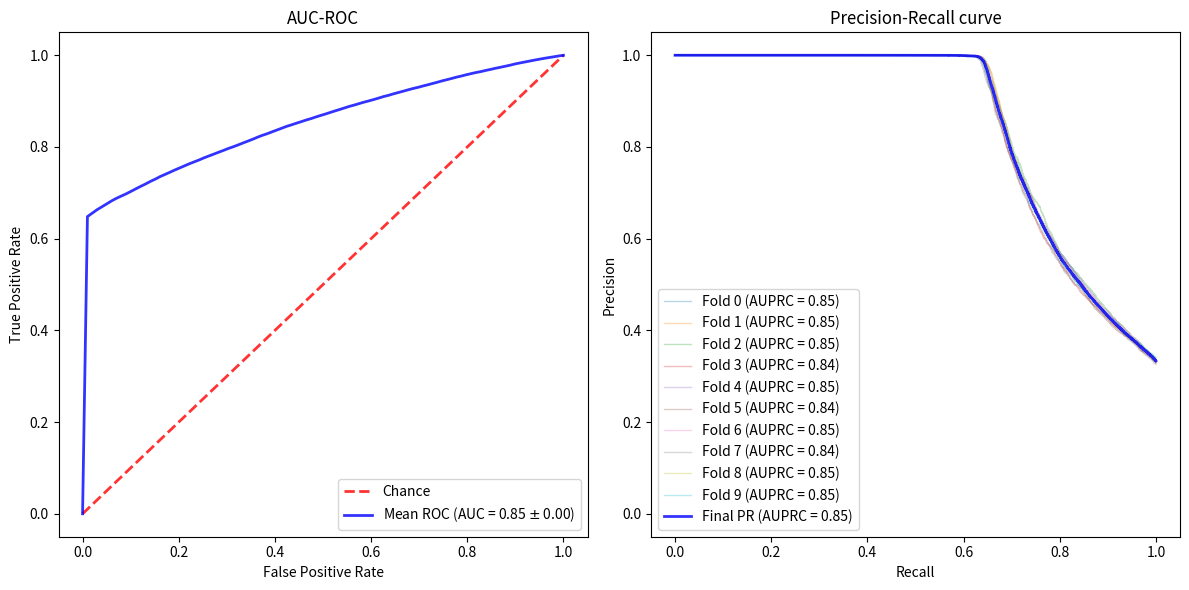

In [102]:
y_test_pred, final_roc_auc, final_auprc = XGB_aucroc(final_train)

In [103]:
submission = pd.DataFrame()
submission['id'] = final_test.index.values
submission['target'] = y_test_pred
submission.to_csv('xgb_submit.csv', float_format='%.6f', index=False)